<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Project 4 - Supervised Learning Classification: INN Hotels</center></h1>
<h1><center>Jorge Ramon Vazquez Campero</center></h1>

---

---


<center><img src="https://th.bing.com/th/id/R.8530a59736209430f8710ee60a231e61?rik=e2upkQ65TLGy8w&riu=http%3a%2f%2fcreativemite.com%2fimg%2flogo%2fInn-Hotels-Official-color.png&ehk=dDBg7jmsBKSMMLoEBxu3XdVy9zchx38Uluu5asTExM4%3d&risl=&pid=ImgRaw&r=0"></center>

---

---


<!-- ## Table of Contents

1. [Problem Statement](#problem-statement)

   - [Business Context](#business-context)
   - [Objective](#objective)
   - [Data Description](#data-description)

2. [Data Overview](#data-overview)

3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

   - [Univariate Analysis](#univariate-analysis)
     - [Analysis of Numerical Features](#analysis-of-numerical-features)
     - [Analysis of Categorical Features](#analysis-of-categorical-features)
   - [Bivariate Analysis](#bivariate-analysis)
     - [Analysis of Numerical vs. Numerical Features](#analysis-of-numerical-vs-numerical-features)
     - [Analysis of Categorical vs. Numerical Features](#analysis-of-categorical-vs-numerical-features)
     - [Analysis of Categorical vs. Categorical Features](#analysis-of-categorical-vs-categorical-features)

4. [Data Preprocessing](#data-preprocessing)
   - [Missing Value Check and Treatment](#missing-value-check-and-treatment)
   - [Outlier Check and Treatment](#outlier-check-and-treatment)
   - [Feature Engineering](#feature-engineering)
   - [Data Transformation](#data-transformation)
   - [Data Splitting](#data-splitting)
   - [EDA Post Preprocessing](#eda-post-preprocessing)
5. [Model Building and Evaluation](#model-building-and-evaluation)

   - [Logistic Regression](#logistic-regression)
     - [Model Building using Logistic Regression](#model-building-using-logistic-regression)
     - [Model Assumptions Check](#model-assumptions-check)
     - [Model Interpretation and Coefficient Analysis](#model-interpretation-and-coefficient-analysis)
     - [Model Performance Evaluation](#model-performance-evaluation)
     - [Threshold Tuning and Performance Improvement](#threshold-tuning-and-performance-improvement)
   - [Decision Tree](#decision-tree)
     - [Model Building using Decision Tree](#model-building-using-decision-tree)
     - [Model Interpretation and Feature Importance](#model-interpretation-and-feature-importance)
     - [Model Performance Evaluation](#model-performance-evaluation)
     - [Pruning and Performance Improvement](#pruning-and-performance-improvement)
     - [Decision Rules Extraction](#decision-rules-extraction)

6. [Comparison of Models](#comparison-of-models)

   - [Comparison of Logistic Regression and Decision Tree Models](#comparison-of-logistic-regression-and-decision-tree-models)
   - [Final Model Selection](#final-model-selection)

7. [Actionable Insights and Recommendations](#actionable-insights-and-recommendations)
   - [Key Findings](#key-findings)
   - [Business Implications](#business-implications)
   - [Recommendations for the Hotel Management](#recommendations-for-the-hotel-management)
8. [Conclusion](#conclusion)
   - [Summary of Insights](#summary-of-insights)
   - [Final Recommendations](#final-recommendations) -->


## 1. Problem Statement and Business Context

### 1.1 Business Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:

1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### 1.2 Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### 1.3 Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

- `Booking_ID`: unique identifier of each booking
- `no_of_adults`: Number of adults
- `no_of_children`: Number of Children
- `no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan`: Type of meal plan booked by the customer:
  - `Not Selected` – No meal plan selected
  - `Meal Plan 1` – Breakfast
  - `Meal Plan 2` – Half board (breakfast and one other meal)
  - `Meal Plan 3` – Full board (breakfast, lunch, and dinner)
- `required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- `lead_time`: Number of days between the date of booking and the arrival date
- `arrival_year`: Year of arrival date
- `arrival_month`: Month of arrival date
- `arrival_date`: Date of the month
- `market_segment_type`: Market segment designation.
- `repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- `no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status`: Flag indicating if the booking was canceled or not.


## Importing necessary libraries and data


In [1]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user


**Note**: _After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again._


In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

# Suppress warnings to prevent them from being displayed during code execution
import warnings
warnings.filterwarnings('ignore')

# Enable the inline plotting of matplotlib figures directly within the notebook
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Suppress warnings to prevent them from being displayed during code execution
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


In [3]:
# Load the dataset
data = pd.read_csv("INNHotelsGroup.csv")

# Copying data to another variable to avoid any changes to original data
df = data.copy()


## <a id="data-overview"></a>2. Data Overview

- Observations
- Sanity checks


In [4]:
# Display the first few rows of the dataset
display(df.head())

# Display the last few rows of the dataset
display(df.tail())


Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [5]:
# Display the shape of the dataset
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns.\n\n")

# Display the data types of the columns in the dataset
display(df.info())


There are 36275 rows and 19 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275

None

Observations:

- There are 5 Categorical features; `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `booking_status`.
- The rest of the features (13) are of numerical nature.
- We will also have to drop the `Booking_ID` column since it is irrelevant for the context of the data.


In [6]:
# Dropping Booking ID column
df.drop("Booking_ID", axis=1, inplace=True)


In [7]:
# Display the statistical summary for the numerical dataset
df.describe().T


count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

In [8]:
# Display the statistical summary for the categorical dataset
df.describe(include="object").T


count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

In [9]:
# Making a list of all categorical variables ()'object' or 'category')
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Iterate through each categorical column and print the count of unique categorical levels, followed by a separator line.
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------------------------------------


In [10]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df.select_dtypes(include=["int64", "float64", "complex"]).columns

# Iterate through each numerical column and print summary statistics, followed by a separator line.
for column in num_cols:
    print(df[column].describe())
    print("-" * 50)


count   36275.00000
mean        1.84496
std         0.51871
min         0.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: no_of_adults, dtype: float64
--------------------------------------------------
count   36275.00000
mean        0.10528
std         0.40265
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        10.00000
Name: no_of_children, dtype: float64
--------------------------------------------------
count   36275.00000
mean        0.81072
std         0.87064
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         7.00000
Name: no_of_weekend_nights, dtype: float64
--------------------------------------------------
count   36275.00000
mean        2.20430
std         1.41090
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max        17.00000
Name: no_of_week_nights, dtype: float64
--------------------------------------------------
c

## 3. Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.

> **Note**: We will mainly focus on the leading questions next. The detailed EDA can be found in the [Appendix](#Appendix).


**Leading Questions**:

1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?


**The functions below need to be defined to carry out the EDA.**


In [11]:
# Function to create labeled barplots
def labeled_barplot(data, feature, figsize=(20, 6), perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    plt.figure(figsize=figsize)  # set plot size

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="dark",
        order=data[feature].value_counts().index[:n],
    )

    plt.title(f"Distribution of {feature}", fontsize=16)  # add title
    plt.xlabel(feature, fontsize=14)  # add x-axis label
    plt.ylabel("Count", fontsize=14)  # add y-axis label

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.xticks(rotation=90, fontsize=12)  # rotate x-axis labels
    plt.yticks(fontsize=12)  # set y-axis labels size
    plt.show()  # show the plot


# Function to display a histogram and boxplot combined
def histogram_boxplot(data, feature, figsize=(12, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    (
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
        if bins
        else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label="Mean"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )  # Add median to the histogram

    ax_box2.set(xlabel="")  # Remove x-axis label for the boxplot
    ax_hist2.set_xlabel(feature, fontsize=14)  # Add x-axis label for the histogram
    ax_hist2.set_ylabel("Count", fontsize=14)  # Add y-axis label for the histogram
    ax_hist2.legend()  # Add legend to the histogram

    plt.title(f"Distribution of {feature}", fontsize=16)  # Add title to the histogram
    plt.show()  # Show the plot


In [12]:
# Let's create a copy of the data
df_eda = df.copy()


### 1. What are the busiest months in the hotel?


Distribution of 'arrival_month'
count   36275.00000
mean        7.42365
std         3.06989
min         1.00000
25%         5.00000
50%         8.00000
75%        10.00000
max        12.00000
Name: arrival_month, dtype: float64


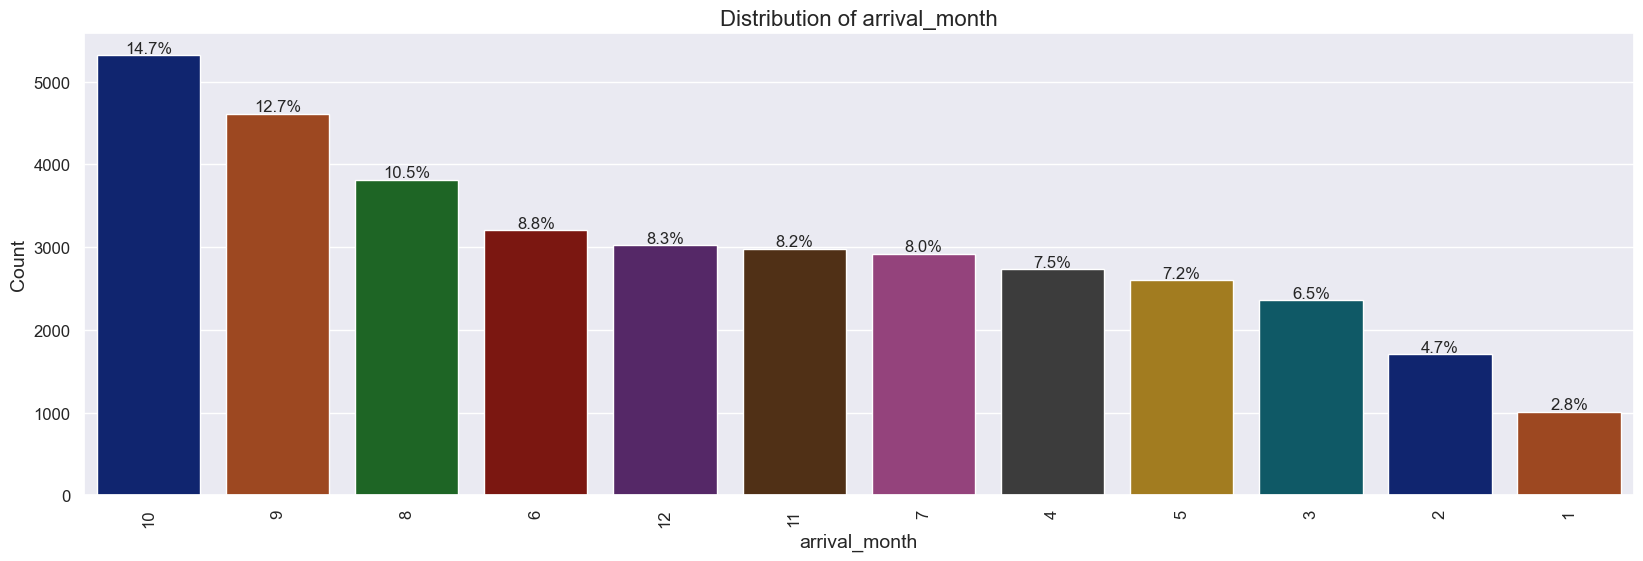

----------------------------------------------------------------------------------------------------


In [13]:
# Count the number of bookings per month
monthly_bookings = df_eda["arrival_month"].value_counts().sort_index()

print("Distribution of 'arrival_month'")
print(df_eda["arrival_month"].describe())
labeled_barplot(df_eda, "arrival_month", perc=True)
print("-" * 100)


Busiest Months Observations:

- The top 5 busiest months according to the data are as following:
  1. October (10)
  2. September (9)
  3. August (8)
  4. June (6)
  5. December (12)


### 2. Which market segment do most of the guests come from?


Distribution of 'market_segment_type'
count      36275
unique         5
top       Online
freq       23214
Name: market_segment_type, dtype: object


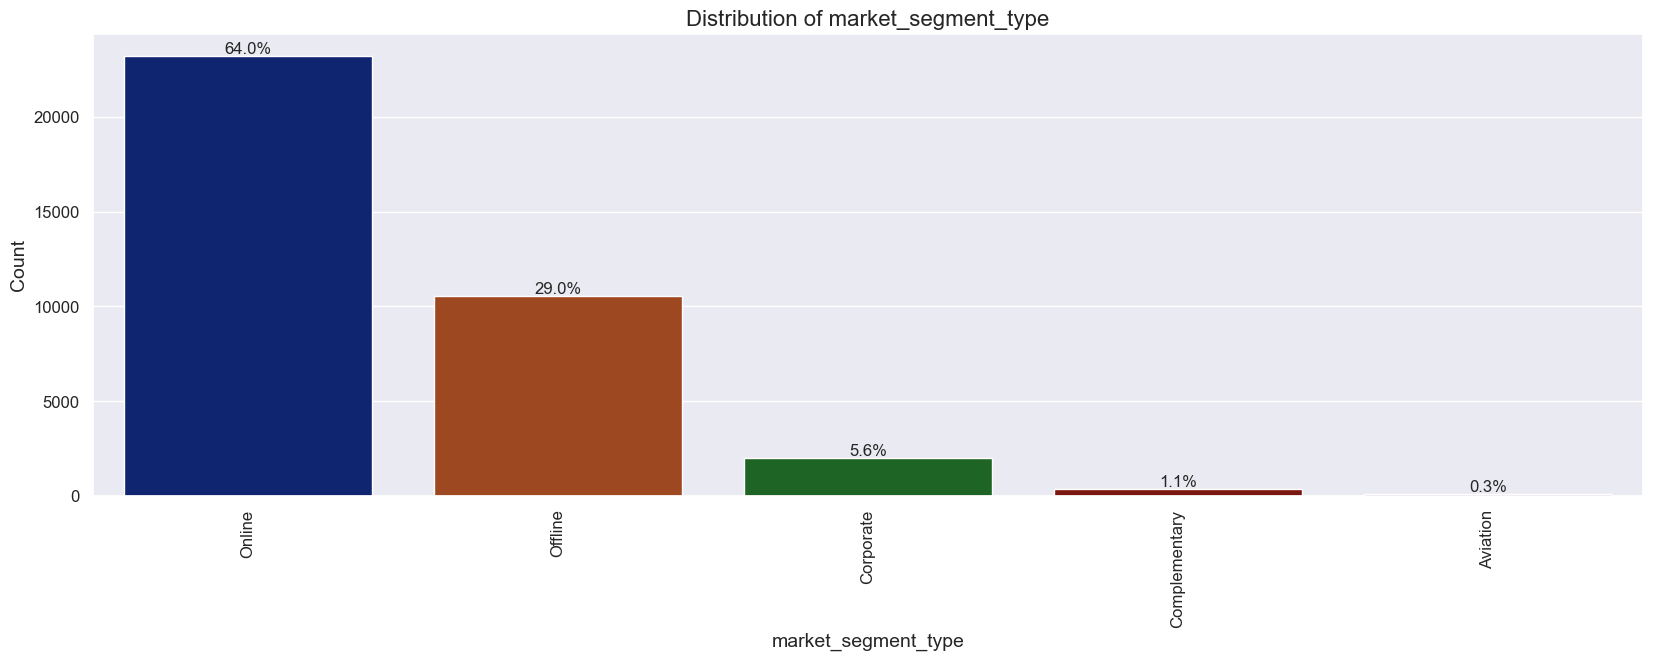

Market Segment Type Counts:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [14]:
# Count the number of bookings per market segment
market_segment_counts = df_eda["market_segment_type"].value_counts()

print("Distribution of 'market_segment_type'")
print(df_eda["market_segment_type"].describe())
labeled_barplot(df_eda, "market_segment_type", perc=True)
print("Market Segment Type Counts:")
print(market_segment_counts)
print("-" * 100)


Market Segment Observations:

- Mosts of the guests come from the Online Market Segment with 64%.
- Offline and Corporate Market segment come next with 29% and 5.6% respectively.


### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?


Distribution of 'avg_price_per_room' by 'market_segment_type'


count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.63268 24.99560 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 540.00000  
Online              107.10000 131.75000 375.50000

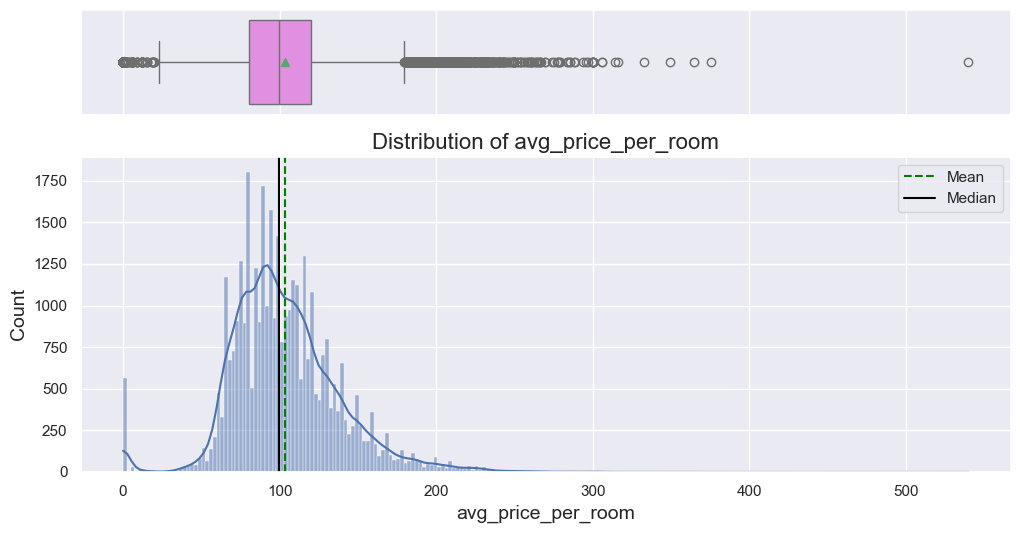

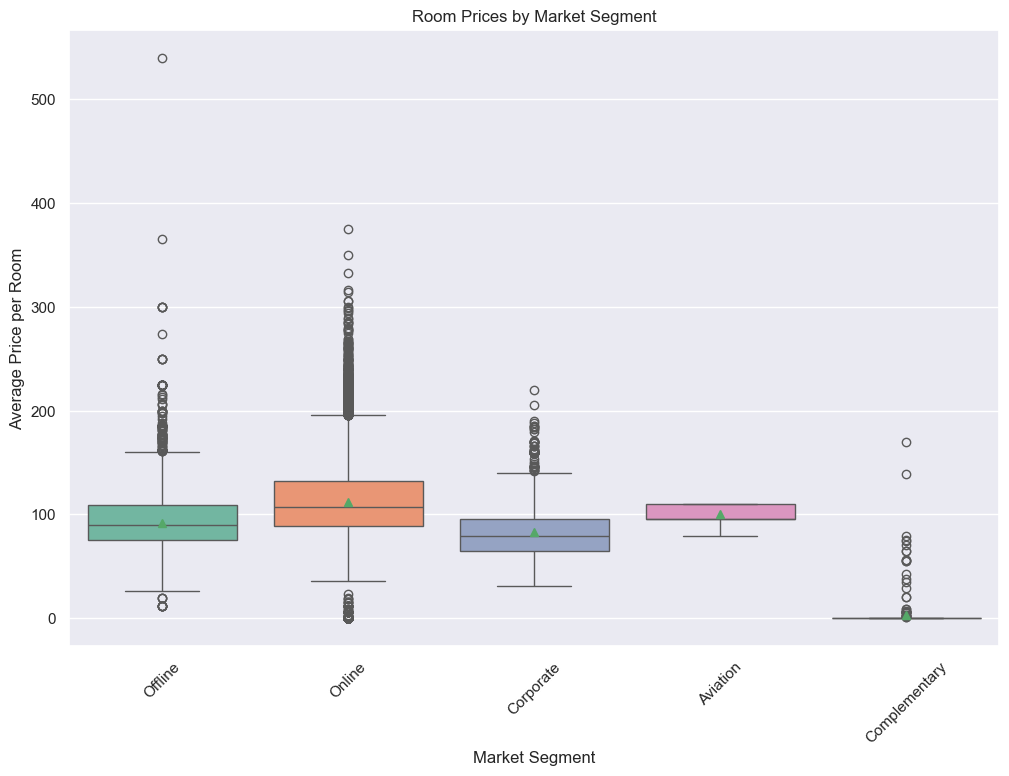

----------------------------------------------------------------------------------------------------


In [15]:
# Analyze the differences in room prices by market segment
print("Distribution of 'avg_price_per_room' by 'market_segment_type'")
display(df_eda.groupby("market_segment_type")["avg_price_per_room"].describe())
histogram_boxplot(df_eda, "avg_price_per_room", kde=True)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x="market_segment_type",
    y="avg_price_per_room",
    data=df_eda,
    palette="Set2",
    showmeans=True,
)
plt.title("Room Prices by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.xticks(rotation=45)
plt.show()
print("-" * 100)


Observations of Room Prices by Market Segment:

- As we can see from the segmentation above, the top 3 average room prices go to Online, Aviation, and Offline market segments, with an average price of $111.34, $110.70, and $91.37 respectively.
- This means that on average online, aviation and offline customers pay more for their rooms on average than any other type of customer.


### 4. What percentage of bookings are canceled?


Distribution of 'booking_status'
count            36275
unique               2
top       Not_Canceled
freq             24390
Name: booking_status, dtype: object


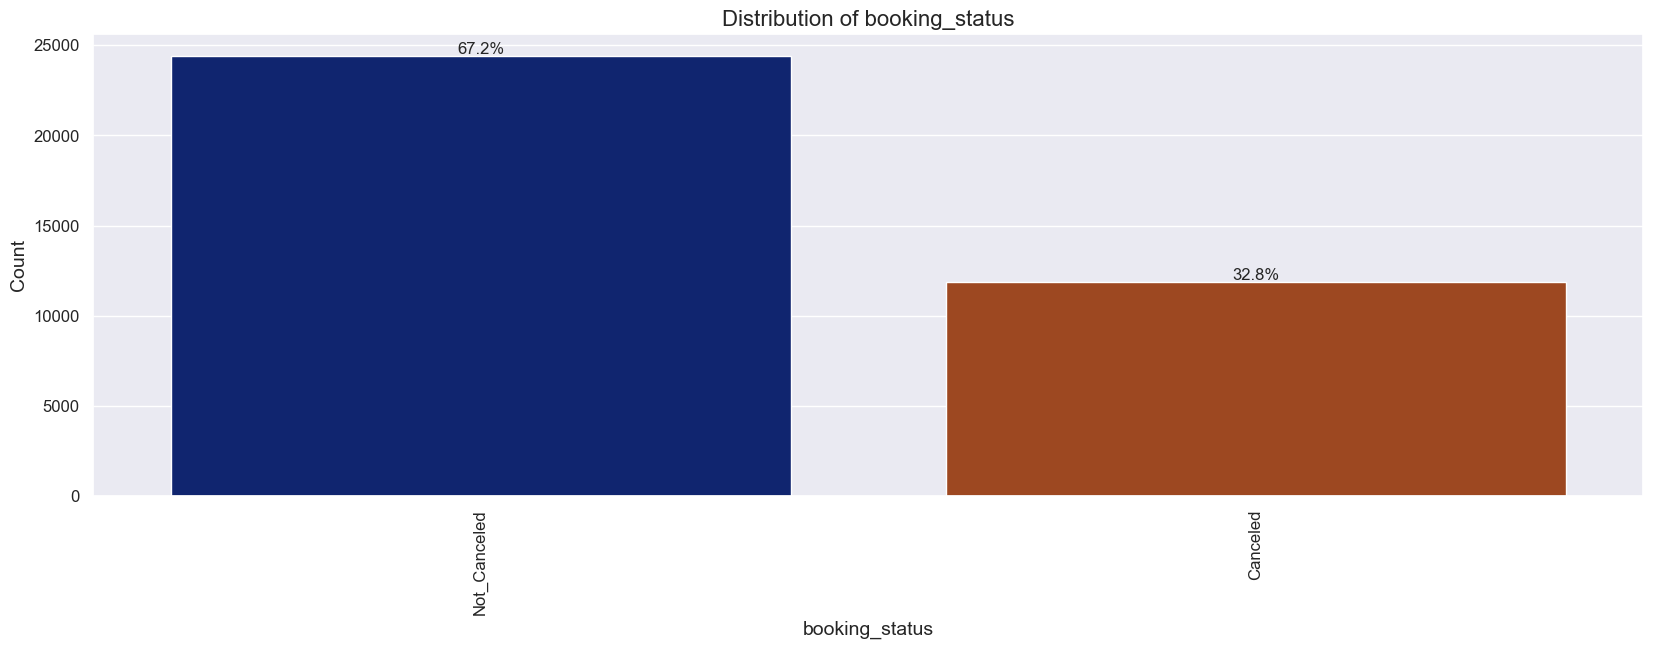

Percentage of Bookings Canceled:
booking_status
Not_Canceled   67.23639
Canceled       32.76361
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------


In [16]:
# Calculate the percentage of bookings canceled
cancellation_rate = df_eda["booking_status"].value_counts(normalize=True) * 100

print("Distribution of 'booking_status'")
print(df_eda["booking_status"].describe())
labeled_barplot(df_eda, "booking_status", perc=True)
print("Percentage of Bookings Canceled:")
print(cancellation_rate)
print("-" * 100)


Observations of Bookings Cancelled:

- As we can see, majority of the bookings end up not being cancelled. 67.24% to be precise.
- The rest 32.76% of the bookings were cancelled.


### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?


Distribution of 'booking_status' for Repeating Guests
count              930
unique               2
top       Not_Canceled
freq               914
Name: booking_status, dtype: object


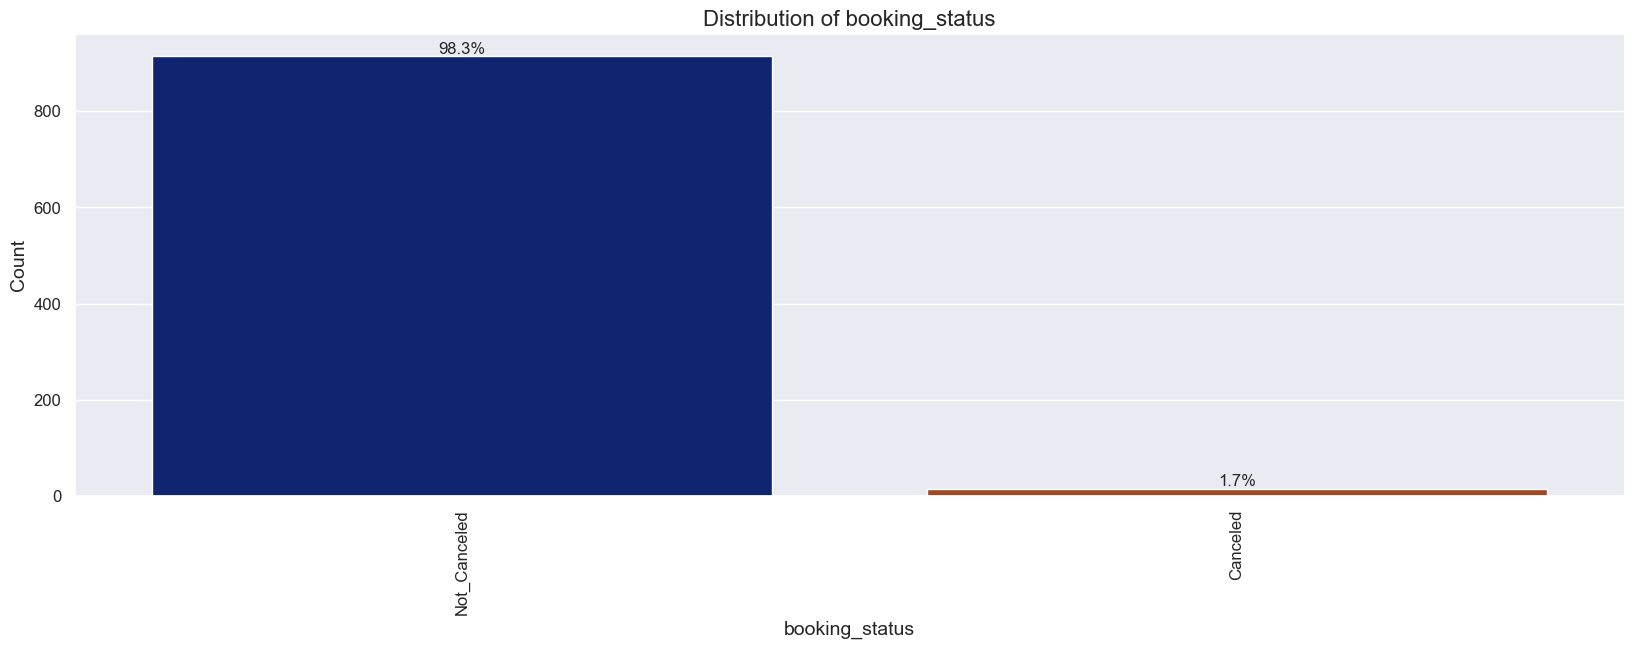

Percentage of Repeating Guests Who Canceled:
booking_status
Not_Canceled   98.27957
Canceled        1.72043
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------


In [17]:
# Filter for repeating guests
repeating_guests = df_eda[df_eda["repeated_guest"] == 1]

# Calculate the cancellation rate among repeating guests
repeating_guest_cancellation_rate = (
    repeating_guests["booking_status"].value_counts(normalize=True) * 100
)

print("Distribution of 'booking_status' for Repeating Guests")
print(repeating_guests["booking_status"].describe())
labeled_barplot(repeating_guests, "booking_status", perc=True)
print("Percentage of Repeating Guests Who Canceled:")
print(repeating_guest_cancellation_rate)
print("-" * 100)


Observations of Repeating Guests Who Canceled:

- The observations are pretty similar. A great majority of 98.3% of repeating guests do not cancel their stay.
- Meanwhile the 1.7% that remain belong to repeating guests who canceled.


### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?


Distribution of 'no_of_special_requests' by 'booking_status'


count    mean     std     min     25%     50%     75%  \
booking_status                                                               
Canceled       11885.00000 0.33462 0.57435 0.00000 0.00000 0.00000 1.00000   
Not_Canceled   24390.00000 0.75855 0.83653 0.00000 0.00000 1.00000 1.00000   

                   max  
booking_status          
Canceled       2.00000  
Not_Canceled   5.00000

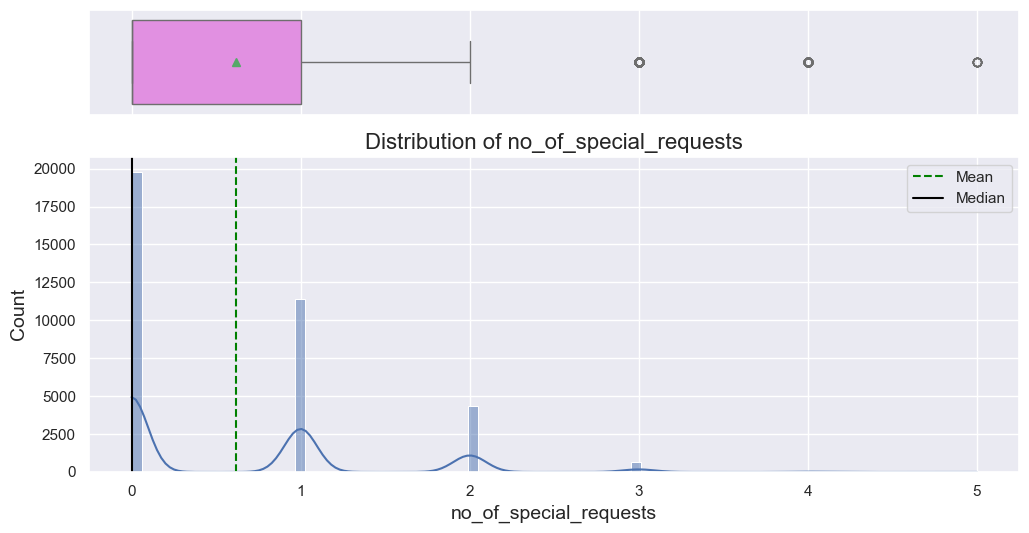

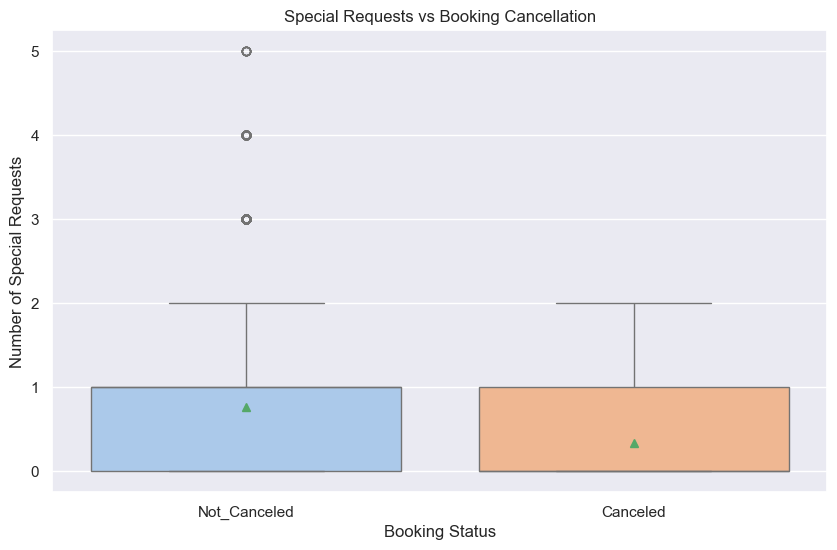

Average Number of Special Requests by Booking Status:
booking_status
Canceled       0.33462
Not_Canceled   0.75855
Name: no_of_special_requests, dtype: float64
----------------------------------------------------------------------------------------------------


In [18]:
# Analyze the relationship between special requests and booking cancellation
print("Distribution of 'no_of_special_requests' by 'booking_status'")
display(df_eda.groupby("booking_status")["no_of_special_requests"].describe())
histogram_boxplot(df_eda, "no_of_special_requests", kde=True)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="booking_status",
    y="no_of_special_requests",
    data=df_eda,
    palette="pastel",
    showmeans=True,
)
plt.title("Special Requests vs Booking Cancellation")
plt.xlabel("Booking Status")
plt.ylabel("Number of Special Requests")
plt.show()

# Additionally, calculate the average number of special requests for each booking status
special_requests_cancellation = df_eda.groupby("booking_status")[
    "no_of_special_requests"
].mean()

print("Average Number of Special Requests by Booking Status:")
print(special_requests_cancellation)
print("-" * 100)


Observations of Special Requests by Booking Status:

- We can see clearly that the number of special requests do not really affect the cancellation.


## <a id="data-preprocessing"></a>4. Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)


In [19]:
# Let's create a copy of the data
df_preprocessing = df_eda.copy()


### <a id="missing-value-check-and-treatment"></a>4.1 Missing Value & Duplicates Check and Treatment


Checking for Missing values


In [20]:
# Checking missing values across each column
missing_values = df_preprocessing.isnull().sum()
print("The number of missing values on each column of the data set is:")
missing_values


The number of missing values on each column of the data set is:


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- We can confirm here there are no apparent missing values here in the data.


Checking for Duplicates


In [21]:
# Check for complete duplicate records
duplicate_records = df_preprocessing.duplicated().sum()
print("The number of duplicate values on the data set is:", duplicate_records)


The number of duplicate values on the data set is: 10275


In [22]:
# Identify all duplicate rows, including the first occurrence
all_duplicate_rows = df_preprocessing[df_preprocessing.duplicated(keep=False)]

# Display all duplicate rows
display(all_duplicate_rows)


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
5                 2               0                     0                  2   
7                 2               0                     1                  3   
...             ...             ...                   ...                ...   
36261             1               0                     2                  4   
36263             1               0                     2                  1   
36267             2               0                     1                  0   
36268             1               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
5           Meal Plan 2                           0        Room_Type 1   
7           Meal Plan 1                           0        Room_Type 4   
...                 ...                         ...                ...   
36261       Meal Plan 1                           0        Room_Type 1   
36263       Meal Plan 1                           0        Room_Type 1   
36267      Not Selected                           0        Room_Type 1   
36268       Meal Plan 1                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
2              1          2018              2            28   
3            211          2018              5            20   
5            346          2018              9            13   
7             83          2018             12            26   
...          ...           ...            ...           ...   
36261        245          2018              7             6   
36263        116          2018              2            28   
36267         49          2018              7            11   
36268        166          2018             11             1   
36274        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
5                  Online               0                             0   
7                  Online               0                             0   
...                   ...             ...                           ...   
36261             Offline               0                             0   
36263              Online               0                             0   
36267              Online               0                             0   
36268             Offline               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
2                                         0            60.00000   
3                                         0           100.00000   
5                                         0           115.00000   
7                                         0           105.61000   
...                                     ...                 ...   
36261                         

In [23]:
# Check for duplicates in individual columns
for column in df_preprocessing:
    print(f"Duplicates in {column}: {df_preprocessing[column].duplicated().sum()}")
    print("-" * 50)


Duplicates in no_of_adults: 36270
--------------------------------------------------
Duplicates in no_of_children: 36269
--------------------------------------------------
Duplicates in no_of_weekend_nights: 36267
--------------------------------------------------
Duplicates in no_of_week_nights: 36257
--------------------------------------------------
Duplicates in type_of_meal_plan: 36271
--------------------------------------------------
Duplicates in required_car_parking_space: 36273
--------------------------------------------------
Duplicates in room_type_reserved: 36268
--------------------------------------------------
Duplicates in lead_time: 35923
--------------------------------------------------
Duplicates in arrival_year: 36273
--------------------------------------------------
Duplicates in arrival_month: 36263
--------------------------------------------------
Duplicates in arrival_date: 36244
--------------------------------------------------
Duplicates in market_segmen

- There are no duplicate rows in the data frame as seen by `duplicate_records`.
- The duplicates in each individual row are irrelevant as it is expected that not all columns would have an individual value phones share some of the same properties.


### <a id="feature-engineering"></a>4.2 Feature Engineering


There are a few features we can implement to get more insights into the data. Here we will implement the following:

- We will create a new feature called `total_nights` representing the total number of nights stayed (weekend + week nights).
- We will also create a new binary feature `any_special_requests` indicating whether a customer made any special requests.
- We will also be transforming `booking_status` to a binary feature.


In [24]:
# Check the unique values in the booking_status column
print(data["booking_status"].unique())


['Not_Canceled' 'Canceled']


In [25]:
# Creating new features for total number of nights stayed (weekend + weekday nights)
df_preprocessing["total_nights"] = (
    df_preprocessing["no_of_weekend_nights"] + df_preprocessing["no_of_week_nights"]
)

# Creating a binary feature for whether a customer made any special requests
df_preprocessing["any_special_requests"] = df_preprocessing[
    "no_of_special_requests"
].apply(lambda x: 1 if x > 0 else 0)


In [26]:
# Display the data types of the columns in the dataset
display(df_preprocessing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

None

In [27]:
# Display the first few rows of the dataset
display(df_preprocessing.head())


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  total_nights  any_special_requests  
0                       0   Not_Canceled             3                     0  
1                       1   Not_Canceled             5                     1  
2                       0       Canceled             3                     0  
3                       0       Canceled             2                     0  
4                       0       Canceled             2                     0

### <a id="outlier-check-and-treatment"></a>4.3 Outlier Check and Treatment


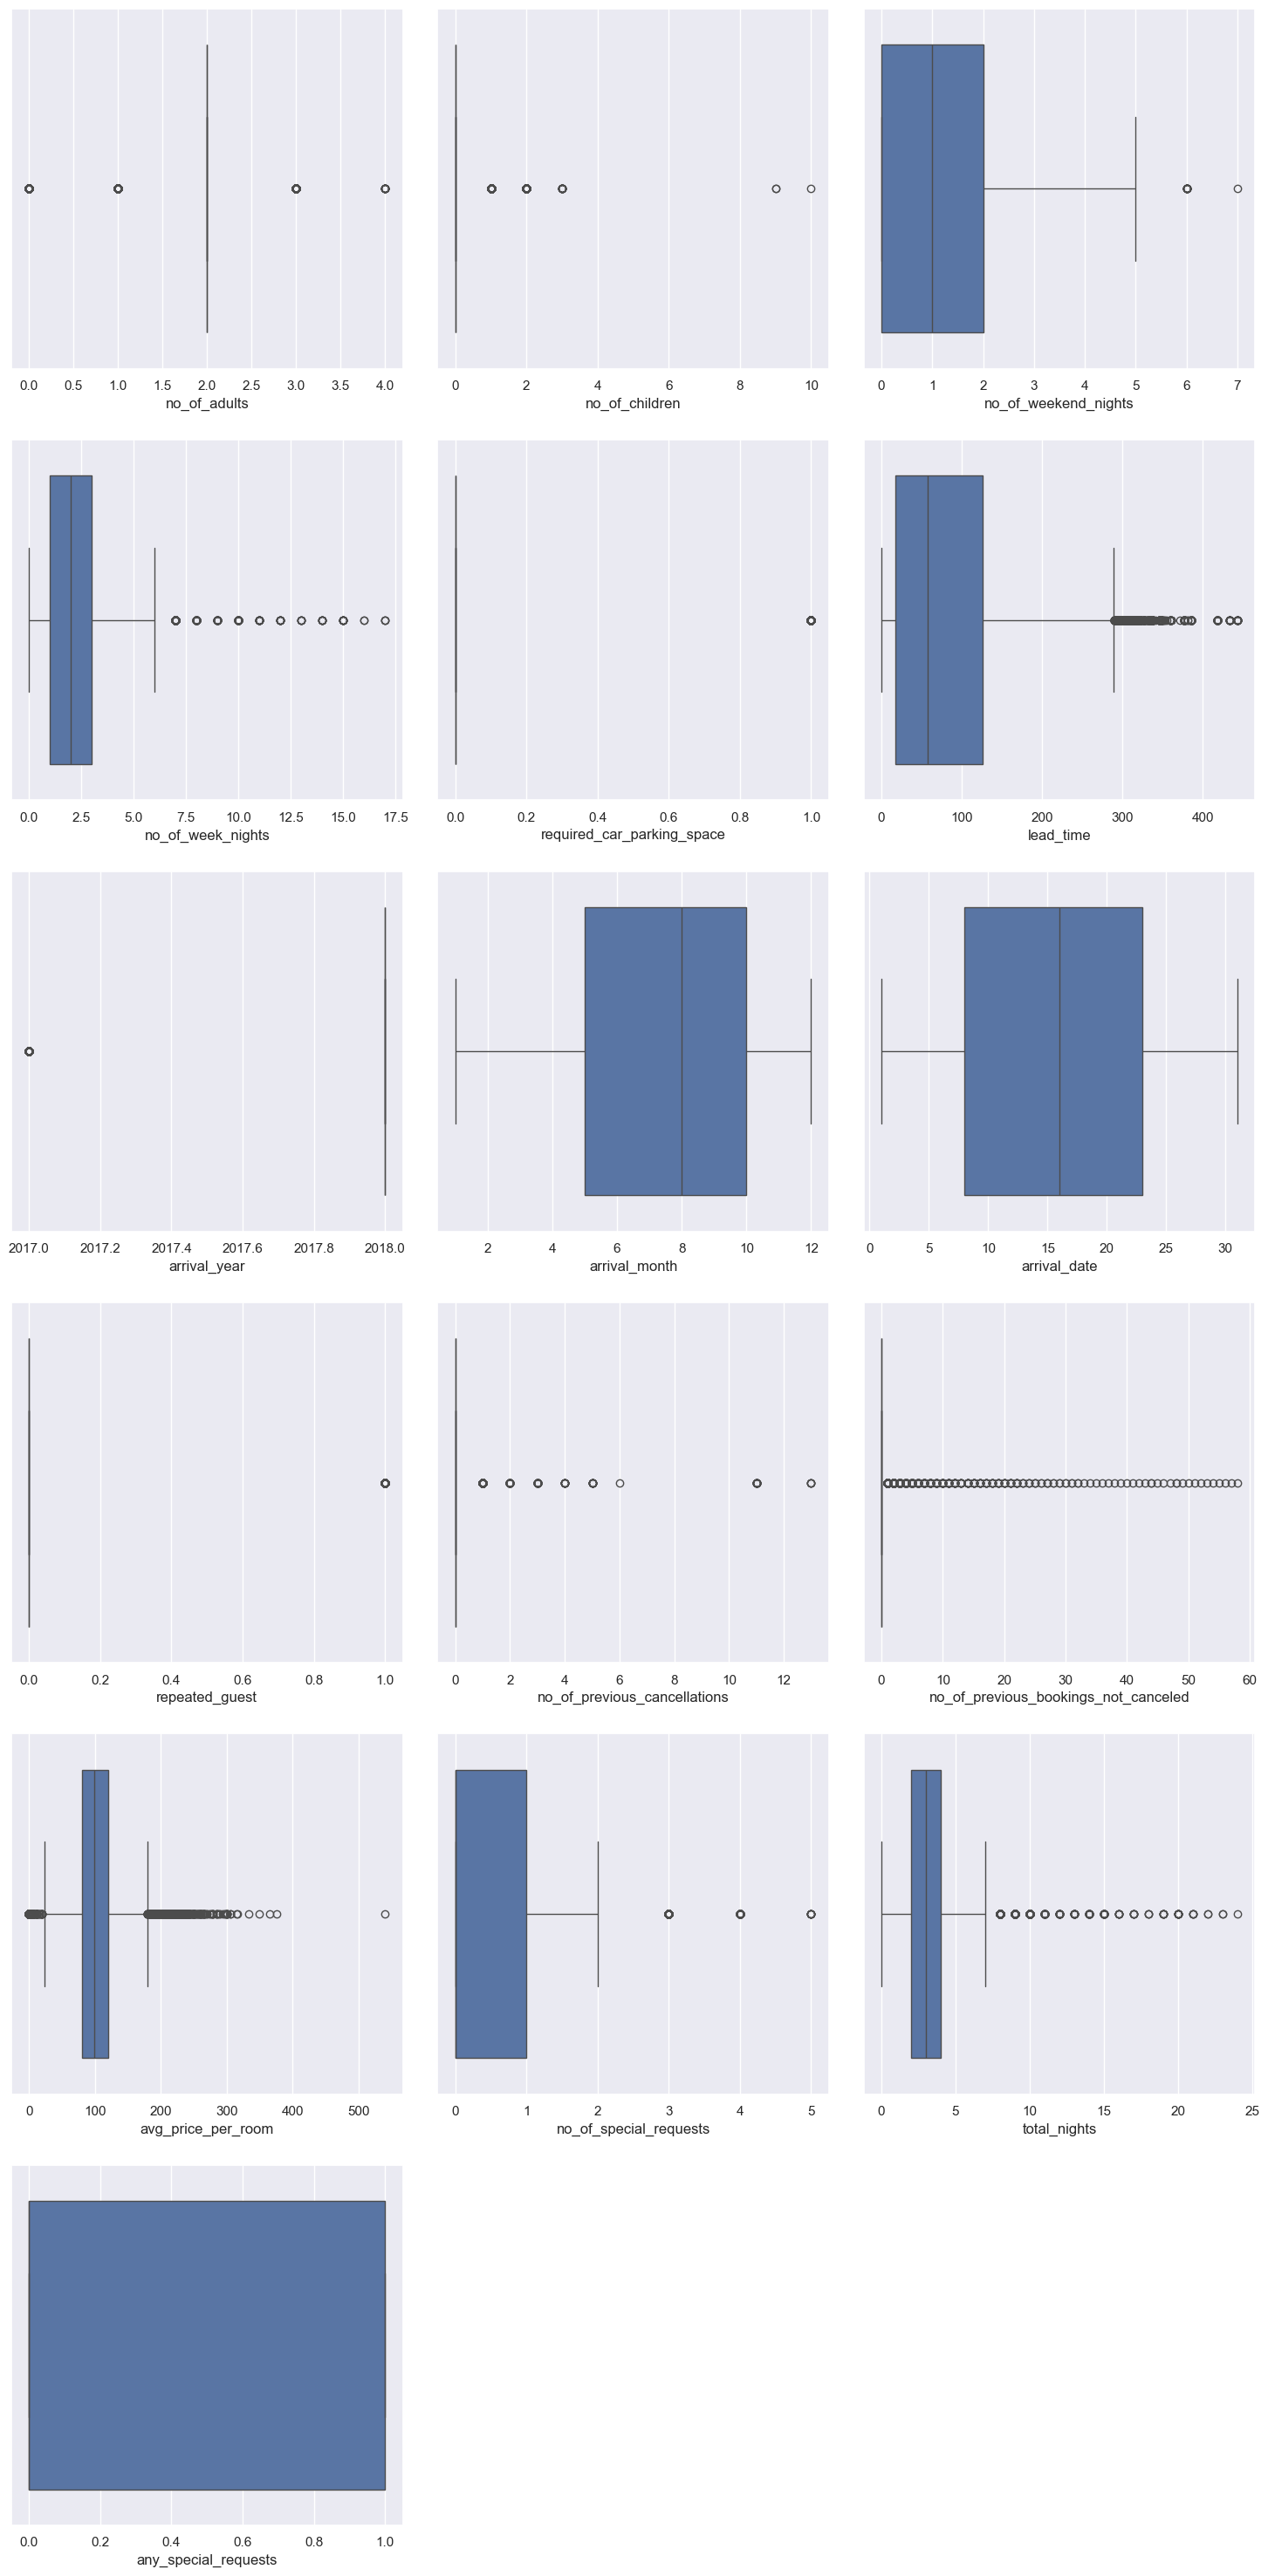


Summary of the numerical features, including outliers:


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  total_nights  any_special_requests  
count             36275.00000   36275.00000           36275.00000  
mean                  0.61966       3.01502               0.45480  
std                   0.78624       1.78602               0.49796  
min                   0.00000       0.00000               0.00000  
25%                   0.00000       2.00000               0.00000  
50%                   0.00000       3.00000               0.00000  
75%                   1.00000       4.00000               1.00000  
max                   5.00000      24.00000               1.00000

In [28]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df_preprocessing.select_dtypes(
    include=["int64", "float64", "complex"]
).columns

# Calculate the number of rows needed for the subplots
num_plots = len(num_cols)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create subplots
plt.figure(figsize=(15, num_rows * 5))
for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df_preprocessing, x=variable)
    plt.tight_layout(pad=2)
plt.show()

# Check for outliers in continuous variables
outliers = df_preprocessing[num_cols].describe()
print("\nSummary of the numerical features, including outliers:")
display(outliers)


Observations:

- Outliers were identified in continuous variables with notable values in;

  - `lead_time`
  - `no_of_previous_cancellations`
  - `no_of_previous_bookings_not_canceled`
  - `avg_price_per_room`
  - `total_nights`

- Outlier Investigation: There are a few features that warrant further investigation concerning outliers.

  - One notable example is the single high price outlier of over $500 in the `avg_price_per_room` feature.
  - Another area requiring scrutiny is the instances where `no_of_children` > 0 and `no_of_adults` = 0, as this seems inconsistent and could indicate data entry errors or unusual cases that need closer examination.

- **Impact of Outlier Treatment**: In previous iterations of this model, I observed that treating outliers resulted in two or more variables becoming perfectly collinear. This caused the logistic regression model to fail when computing coefficients for these variables.
- **Effect of Multicollinearity Treatment**: Additionally, after addressing multicollinearity, as well as removing constant and duplicate columns, the model's performance declined compared to when multicollinearity was left untreated.


> In addition, considering that our model needs to account for real-world scenarios, which can be highly unique, **<u>we will not be addressing outliers or multicollinearity prior to building the initial model for this project</u>**. This approach allows the model to capture the full variability of the data, reflecting the diverse situations it may encounter in practice.


### <a id="data-transformation"></a>4.4 Preparing Data for Modeling


In [29]:
# Let's create another copy of the data
dfmodeling = df_preprocessing.copy()


In [30]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


def identify_and_prepare_data(
    df, target_column, exclude_columns=None, multicollinearity_threshold=0.95
):
    """
    Automatically identify categorical and derived columns, then prepare the data for modeling.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_column (str): The name of the target variable column.
    exclude_columns (list): List of columns to exclude from processing (e.g., ID columns).
    multicollinearity_threshold (float): Threshold for identifying derived columns with high multicollinearity.

    Returns:
    X (pd.DataFrame): The features DataFrame after dropping unnecessary columns.
    y (pd.Series): The target variable series.
    categorical_columns (list): List of identified categorical columns.
    derived_columns (list): List of identified derived columns.
    """

    if exclude_columns is None:
        exclude_columns = []

    # Identify categorical columns
    categorical_columns = df.select_dtypes(
        include=["object", "category"]
    ).columns.tolist()

    # Remove the target column and excluded columns from categorical columns list
    categorical_columns = [
        col
        for col in categorical_columns
        if col not in [target_column] + exclude_columns
    ]

    # Encode categorical columns
    for col in categorical_columns:
        df[f"{col}_encoded"] = LabelEncoder().fit_transform(df[col])

    # Drop original categorical columns after encoding
    df = df.drop(columns=categorical_columns)

    # Identify derived columns based on multicollinearity
    # Ensure we only consider numeric columns for the correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr().abs()

    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )

    # Identify columns with high correlation to drop
    derived_columns = [
        "total_nights"
        # column
        # for column in upper_triangle.columns
        # if any(upper_triangle[column] > multicollinearity_threshold)
    ]

    # Create the list of columns to drop
    columns_to_drop = [target_column] + derived_columns + exclude_columns

    # Drop unnecessary columns
    X = df.drop(columns=columns_to_drop)
    y = df[target_column].apply(lambda x: 1 if x == "Canceled" else 0)

    return X, y, categorical_columns, derived_columns


# Usage Example
# Assuming df_preprocessing is your DataFrame and "booking_status" is the target variable
X, y, identified_categorical_columns, identified_derived_columns = (
    identify_and_prepare_data(
        df=df_preprocessing,
        target_column="booking_status",
        # exclude_columns=["booking_id"],  # Example of an ID column to exclude
    )
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Outputs: Checking the updated dataset and identified columns
print("First few rows of the training set:")
display(X_train.head())

print("\nFirst few entries of the target variable in the training set:")
display(y_train.head())

print("\nIdentified Categorical Columns:")
print(identified_categorical_columns)

print("\nIdentified Derived Columns:")
print(identified_derived_columns)


First few rows of the training set:


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
25629             2               1                     2                  1   
14473             2               1                     1                  1   
23720             2               0                     0                  3   
5843              2               0                     2                  5   
18709             1               0                     0                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
25629                           0         26          2017             10   
14473                           0         98          2018              7   
23720                           0        433          2018              9   
5843                            0        195          2018              8   
18709                           0        188          2018              6   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
25629            17               0                             0   
14473            16               0                             0   
23720             8               0                             0   
5843              8               0                             0   
18709            15               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
25629                                     0           161.00000   
14473                                     0           121.50000   
23720                                     0            70.00000   
5843                                      0            72.25000   
18709                                     0           130.00000   

       no_of_special_requests  any_special_requests  \
25629                       0                     0   
14473                       2                     1   
23720                       0                     0   
5843                        0                     0   
18709                       0                     0   

       type_of_meal_plan_encoded  room_type_reserved_encoded  \
25629                          0                           0   
14473                          0                           0   
23720                          0                           0   
5843                           0                           0   
18709                          0                           0   

       market_segment_type_encoded  
25629                            4  
14473                            4  
23720                            3  
5843                             3  
18709                            3


First few entries of the target variable in the training set:


25629    0
14473    0
23720    1
5843     0
18709    1
Name: booking_status, dtype: int64


Identified Categorical Columns:
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

Identified Derived Columns:
['total_nights']


In [31]:
# # Data Transformation: Encoding categorical variables
# dfmodeling["type_of_meal_plan_encoded"] = (
#     dfmodeling["type_of_meal_plan"].astype("category").cat.codes
# )
# dfmodeling["room_type_reserved_encoded"] = (
#     dfmodeling["room_type_reserved"].astype("category").cat.codes
# )
# dfmodeling["market_segment_type_encoded"] = (
#     dfmodeling["market_segment_type"].astype("category").cat.codes
# )

# # Separating features and target variable
# X = dfmodeling.drop(
#     columns=[
#         "booking_status",
#         "type_of_meal_plan",
#         "room_type_reserved",
#         "market_segment_type",
#         "total_nights",
#     ]
# )
# y = dfmodeling["booking_status"].apply(
#     lambda x: 1 if x == "Canceled" else 0
# )  # Encoding target variable

# # Splitting the dfmodeling into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Outputs: Checking the updated dfmodelingset, outliers, and splits
# print("First few rows of the training dfmodeling:")
# display(X_train.head())

# print("\nFirst few entries of the target variable in the training set:")
# display(y_train.head())


In [32]:
# Display the shapes of the training and testing sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

print("\nPercentage of classes in training set:")
display(y_train.value_counts(normalize=True))

print("\nPercentage of classes in test set:")
display(y_test.value_counts(normalize=True))


Shape of Training set :  (29020, 18)
Shape of test set :  (7255, 18)

Percentage of classes in training set:


booking_status
0   0.67371
1   0.32629
Name: proportion, dtype: float64


Percentage of classes in test set:


booking_status
0   0.66699
1   0.33301
Name: proportion, dtype: float64

### 4.5 Checking Multicollinearity (Optional if Outlier treatments were performed)

- As mentioned before, in previous iterations of this model, I observed that treating outliers resulted in two or more variables becoming perfectly collinear. This caused the logistic regression model to fail when computing coefficients for these variables.
- **Effect of Multicollinearity Treatment**: Additionally, after addressing multicollinearity, as well as removing constant and duplicate columns, the model's performance declined compared to when multicollinearity was left untreated.

> In addition, considering that our model needs to account for real-world scenarios, which can be highly unique, **<u>we will not be addressing outliers or multicollinearity prior to building the initial model for this project</u>**. This approach allows the model to capture the full variability of the data, reflecting the diverse situations it may encounter in practice.


## 5. Logistic Regression Model Building


### 5.1 Model Evaluation Criteria

In building our categorical regression model, it is crucial to consider the types of errors the model might make:

1. **False Negative**: Predicting that a booking will not be canceled when, in reality, it is canceled. This scenario could lead to resource wastage, additional distribution costs, and lower profit margins due to last-minute attempts to resell the room.

2. **False Positive**: Predicting that a booking will be canceled when, in reality, it is not. This could result in the hotel not adequately preparing for a guest's arrival, potentially leading to dissatisfaction and damage to the hotel's brand equity.

#### Which Case is More Important?

Both types of errors are significant:

- **False Negatives** can result in direct financial losses and operational inefficiencies.
- **False Positives** can damage customer satisfaction and brand reputation.

#### How to Reduce Losses?

- To minimize these risks, we aim to maximize the **`F1 Score`** of our model. The F1 Score is a balanced metric that considers both **`precision`** and **`recall`**, making it particularly useful in scenarios where both _false positives_ and _false negatives_ are costly. By maximizing the F1 Score, we increase our chances of minimizing both types of errors, thereby reducing the potential negative impact on the hotel’s operations and profitability.
- f1_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

#### To streamline our workflow and avoid repeating code for each model, we will create two essential functions that will handle the calculation of different metrics and the generation of a confusion matrix.

- **`model_performance_classification_statsmodels` Function**: This function is designed to evaluate the performance of classification models. By using this function, we can consistently assess the effectiveness of our models across various metrics, ensuring a thorough analysis without redundant code.

- **`confusion_matrix_statsmodels` Function**: This function will be used to plot the confusion matrix, a crucial tool in understanding the types of errors our models are making. By visualizing the confusion matrix, we can gain insights into the performance of our models in distinguishing between different classes, helping us to identify areas for improvement.


In [33]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [34]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages and print TN, FP, FN, TP

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)

    TN, FP, FN, TP = cm.ravel()

    # Display counts for TN, FP, FN, TP
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")

    labels = np.asarray(
        [
            [f"TN: {TN}\n{TN / cm.sum():.2%}", f"FP: {FP}\n{FP / cm.sum():.2%}"],
            [f"FN: {FN}\n{FN / cm.sum():.2%}", f"TP: {TP}\n{TP / cm.sum():.2%}"],
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


### 5.2 Logistic Regression Model


- We will now perform logistic regression using statsmodels, a Python module that offers comprehensive functions for estimating a wide range of statistical models, conducting statistical tests, and exploring statistical data.

- By utilizing statsmodels for logistic regression, we can rigorously assess the statistical validity of our model. This approach allows us to identify the significant predictors by examining the p-values associated with each predictor variable, helping us understand which factors have a meaningful impact on the outcome.

- This method will not only help us build a robust logistic regression model but also provide insights into the significance of each predictor, ensuring that our model is both accurate and interpretable.


In [35]:
# Building the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29002
Method:                           MLE   Df Model:                           17
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.3097
Time:                        01:50:41   Log-Likelihood:                -12651.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.0401      0.034      1.169      0.242      -0.027       0.107
no_of_children                          -0.0503      

**Observations**

- Pseudo R-squared indicates that approximately 31% of the variance in the dependent variable (booking_status) is explained by the model. While this is not a very high value, it suggests a decent level of explanatory power for a logistic regression model.

- Variables with p-values less than 0.05 are considered statistically significant. These include:

  - `required_car_parking_space`
  - `lead_time`
  - `arrival_year`
  - `arrival_month`
  - `repeated_guest`
  - `avg_price_per_room`
  - `no_of_special_requests`
  - `market_segment_type_encoded`

- Variables with p-values greater than 0.05 are considered statistically insignificant. These include:

  - `no_of_adults`
  - `no_of_children`
  - `arrival_date`
  - `no_of_previous_bookings_not_canceled`

- It appears that some variables, such as `no_of_weekend_nights`, `no_of_week_nights`, and `total_nights`, have resulted in `NaN` values in the output. This could be due to multicollinearity or perfect separation in the data.
- Will investigate further by checking for multicollinearity or considering dropping these variables from the model.

- Negative values of the coefficient show that the probability of a booking being cancelled increases with the decrease of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking being canceled increases with the increase of the corresponding attribute value.


True Negatives (TN): 17543
False Positives (FP): 2008
False Negatives (FN): 3669
True Positives (TP): 5800


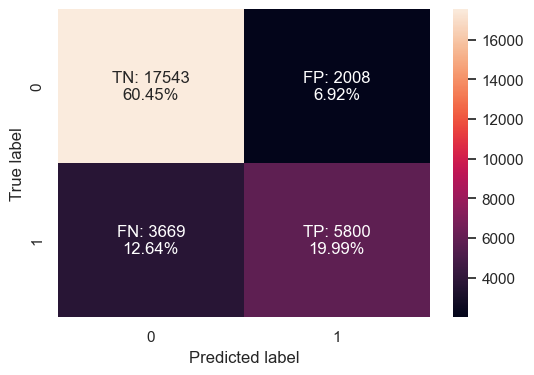

Training performance:


Accuracy  Recall  Precision      F1
0   0.80438 0.61253    0.74283 0.67141

In [36]:
# Plot the confusion matrix for the training data
confusion_matrix_statsmodels(lg, X_train, y_train)

# Print the performance metrics for the training data
print("Training performance:")
logit_performance_metrics_train = model_performance_classification_statsmodels(
    lg, X_train, y_train
)
logit_performance_metrics_train


True Negatives (TN): 4352
False Positives (FP): 487
False Negatives (FN): 936
True Positives (TP): 1480


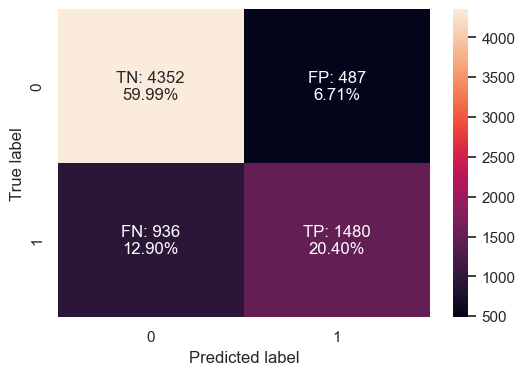

Testing performance:


Accuracy  Recall  Precision      F1
0   0.80386 0.61258    0.75241 0.67534

In [37]:
# Plot the confusion matrix for the testing data
confusion_matrix_statsmodels(lg, X_test, y_test)

# Print the performance metrics for the training data
print("Testing performance:")
logit_performance_metrics_test = model_performance_classification_statsmodels(
    lg, X_test, y_test
)
logit_performance_metrics_test


Observations:

**Training data:**

- **True Negatives (TN)**: The model correctly predicted 17,543 bookings as "Not Canceled," which accounts for about 60.45% of the total predictions. This shows that the model is quite effective at identifying bookings that are not going to be canceled.
- **False Positives (FP)**: There are 2,008 instances where the model incorrectly predicted a booking as "Canceled" when it was actually "Not Canceled." This represents about 6.92% of the total predictions. While this number isn't excessively high, it indicates some room for improvement in reducing false alarms, which could lead to unnecessary operational changes or customer dissatisfaction.
- **False Negatives (FN)**: The model incorrectly predicted 3,669 bookings as "Not Canceled" when they were actually "Canceled." This is about 12.64% of the total predictions. This type of error is more concerning, as it could lead to loss of revenue and operational inefficiencies due to unanticipated cancellations.
- **True Positives (TP)**: The model correctly predicted 5,800 bookings as "Canceled," accounting for about 19.99% of the total predictions. This is a significant portion, indicating that the model is fairly good at identifying cancellations.
  Performance Metrics Observations:
- **Accuracy (80.44%)**: The overall accuracy of the model is 80.44%, meaning that the model correctly classified about 80% of the cases. This is a strong performance, suggesting that the model is generally reliable.
- **Recall (61.25%)**: The recall is 61.25%, which means that the model correctly identified 61.25% of all actual cancellations. This metric shows that while the model is decent at catching cancellations, there is still room to improve, particularly in reducing false negatives.
- **Precision (74.28%)**: The precision is 74.28%, indicating that when the model predicts a cancellation, it is correct about 74.28% of the time. This is a good precision score, showing that the model is fairly accurate when it predicts a cancellation.
- **F1 Score (67.14%)**:The F1 score, which balances precision and recall, is 67.14%. This suggests that the model has a reasonably balanced performance but could benefit from improvements in both recall and precision to enhance its overall effectiveness.

**Testing Data:**

- We can see that the results between the training and the testing data are pretty comparable which is a good indicator for our model.


#### Checking Multicollinearity


There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

- **Variance Inflation factor**: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.

- **General Rule of thumb**:

  - If VIF is 1 then there is no correlation among the &kappa;<sup>th</sup> predictor and the remaining predictor variables, and hence the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

- The purpose of the analysis should dictate which threshold to use.


In [38]:
# Function to calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    return vif_data


# Function to iteratively remove features with high VIF
def remove_high_vif_features(X, threshold=5.0):
    while True:
        vif = calculate_vif(X)
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif["VIF"].idxmax(), "feature"]
            print(
                f"Removing feature with high VIF: {feature_to_remove} (VIF = {max_vif:.2f})"
            )
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X, vif


In [39]:
# Calculate VIF for the features
vif_before = calculate_vif(X_train)
print(vif_before)


                                 feature      VIF
0                           no_of_adults 17.65198
1                         no_of_children  1.34301
2                   no_of_weekend_nights  1.97664
3                      no_of_week_nights  3.76298
4             required_car_parking_space  1.06870
5                              lead_time  2.23127
6                           arrival_year 53.55953
7                          arrival_month  7.23461
8                           arrival_date  4.20731
9                         repeated_guest  1.69811
10          no_of_previous_cancellations  1.35802
11  no_of_previous_bookings_not_canceled  1.61317
12                    avg_price_per_room 15.57239
13                no_of_special_requests  6.53970
14                  any_special_requests  7.34724
15             type_of_meal_plan_encoded  1.41589
16            room_type_reserved_encoded  1.91665
17           market_segment_type_encoded 44.68421


In [40]:
# Iteratively remove features with high VIF
X_train_vif_reduced, final_vif = remove_high_vif_features(X_train)
print("Final VIF values after removing high multicollinearity features:")
print(final_vif)


Removing feature with high VIF: arrival_year (VIF = 53.56)
Removing feature with high VIF: market_segment_type_encoded (VIF = 26.94)
Removing feature with high VIF: no_of_adults (VIF = 13.12)
Removing feature with high VIF: avg_price_per_room (VIF = 8.32)
Removing feature with high VIF: any_special_requests (VIF = 7.09)
Final VIF values after removing high multicollinearity features:
                                 feature     VIF
0                         no_of_children 1.23818
1                   no_of_weekend_nights 1.88363
2                      no_of_week_nights 3.29695
3             required_car_parking_space 1.05835
4                              lead_time 2.12983
5                          arrival_month 4.55520
6                           arrival_date 3.19793
7                         repeated_guest 1.53025
8           no_of_previous_cancellations 1.34571
9   no_of_previous_bookings_not_canceled 1.60304
10                no_of_special_requests 1.72007
11             type_of_me

- Now that Multicollinearity is fixed, we will re-build the model


True Negatives (TN): 16938
False Positives (FP): 2613
False Negatives (FN): 4474
True Positives (TP): 4995


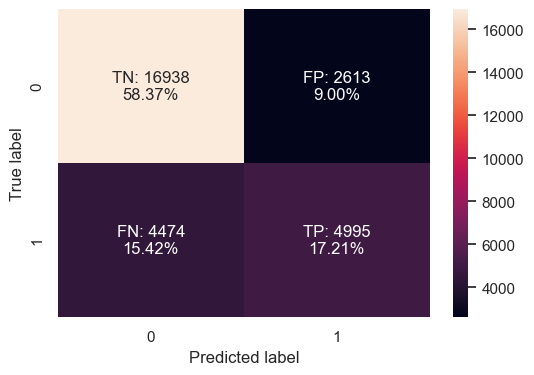

Training performance:


Accuracy  Recall  Precision      F1
0   0.75579 0.52751    0.65655 0.58500

True Negatives (TN): 4206
False Positives (FP): 633
False Negatives (FN): 1154
True Positives (TP): 1262


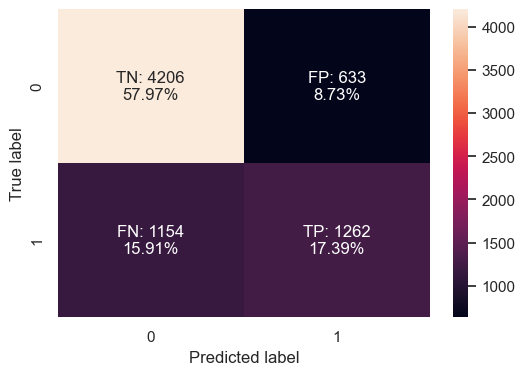

Testing performance:


Accuracy  Recall  Precision      F1
0   0.75369 0.52235    0.66596 0.58548

In [41]:
X_trained_multicoll = X_train_vif_reduced

logit2_multicoll = sm.Logit(y_train, X_trained_multicoll.astype(float))
lg2 = logit2_multicoll.fit(disp=False)

# Plot the confusion matrix for the training data
confusion_matrix_statsmodels(lg2, X_trained_multicoll, y_train)

# Print the performance metrics for the new training data
print("Training performance:")
multicoll_performance_metrics_train = model_performance_classification_statsmodels(
    lg2, X_trained_multicoll, y_train
)
display(multicoll_performance_metrics_train)

# Align the testing data with the reduced training data (after removing high VIF features)
X_test_vif_reduced = X_test[X_train_vif_reduced.columns]
X_test_multicoll = X_test_vif_reduced

# Predict on the testing data
y_test_pred = lg2.predict(X_test_multicoll.astype(float))

# Plot the confusion matrix for the testing data
confusion_matrix_statsmodels(lg2, X_test_multicoll, y_test)

# Print the performance metrics for the testing data
print("Testing performance:")
multicoll_performance_metrics_train = model_performance_classification_statsmodels(
    lg2, X_test_multicoll, y_test
)
display(multicoll_performance_metrics_train)


Observations:

- The second Model actually had a worst performance.
- It would still be recommended to choose the second one since multicollinearity has been addressed by then.


#### Treating High P-values

- For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

- Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.

Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a function will be more efficient.


In [42]:
def remove_high_p_value_variables(X_train, y_train, significance_level=0.05):
    """
    Iteratively remove variables with p-values greater than the significance level from the logistic regression model.
    Displays the initial and final p-values before and after the iteration.

    Parameters:
    X_train (pd.DataFrame): The features DataFrame for the training set.
    y_train (pd.Series): The target variable for the training set.
    significance_level (float): The p-value threshold for keeping variables (default is 0.05).

    Returns:
    final_selected_features (pd.DataFrame): The DataFrame of selected features after removing variables with high p-values.
    final_p_values (pd.Series): The final p-values after the iteration.
    """

    # Initial list of columns
    cols = X_train.columns.tolist()

    # Fit the initial logistic regression model
    initial_model = sm.Logit(y_train, X_train.astype(float)).fit(disp=False)

    # Display initial p-values
    initial_p_values = initial_model.pvalues
    print("Initial p-values:")
    display(initial_p_values)

    while len(cols) > 0:
        # Define the training set with the current list of columns
        X_train_aux = X_train[cols]

        # Fit the logistic regression model
        model = sm.Logit(y_train, X_train_aux.astype(float)).fit(disp=False)

        # Get the p-values and find the maximum p-value
        p_values = model.pvalues
        max_p_value = max(p_values)

        # Name of the variable with the highest p-value
        feature_with_p_max = p_values.idxmax()

        # Check if the highest p-value exceeds the significance level
        if max_p_value > significance_level:
            print(f"Dropping '{feature_with_p_max}' with p-value {max_p_value:.5f}")
            cols.remove(
                feature_with_p_max
            )  # Remove the feature with the highest p-value
        else:
            break  # Stop if all p-values are below the significance level

    # Selected features after the iterative process
    final_selected_features = X_train[cols]

    # Fit the final model with the selected features
    final_model = sm.Logit(y_train, final_selected_features.astype(float)).fit(
        disp=False
    )

    # Display final p-values
    final_p_values = final_model.pvalues
    print("\nFinal p-values after iteration:")
    display(final_p_values)

    return final_selected_features, final_p_values


# Running the function
X_train_pvalues, final_p_values = remove_high_p_value_variables(
    X_trained_multicoll, y_train, significance_level=0.05
)


Initial p-values:


no_of_children                         0.00000
no_of_weekend_nights                   0.00552
no_of_week_nights                      0.00000
required_car_parking_space             0.00000
lead_time                              0.00000
arrival_month                          0.00000
arrival_date                           0.00000
repeated_guest                         0.00000
no_of_previous_cancellations           0.00228
no_of_previous_bookings_not_canceled   0.25613
no_of_special_requests                 0.00000
type_of_meal_plan_encoded              0.00000
room_type_reserved_encoded             0.00000
dtype: float64

Dropping 'no_of_previous_bookings_not_canceled' with p-value 0.25613

Final p-values after iteration:


no_of_children                 0.00000
no_of_weekend_nights           0.00554
no_of_week_nights              0.00000
required_car_parking_space     0.00000
lead_time                      0.00000
arrival_month                  0.00000
arrival_date                   0.00000
repeated_guest                 0.00000
no_of_previous_cancellations   0.00227
no_of_special_requests         0.00000
type_of_meal_plan_encoded      0.00000
room_type_reserved_encoded     0.00000
dtype: float64

True Negatives (TN): 16939
False Positives (FP): 2612
False Negatives (FN): 4472
True Positives (TP): 4997


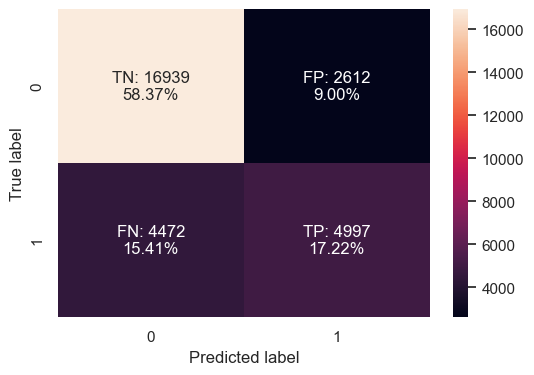

Training performance:


Accuracy  Recall  Precision      F1
0   0.75589 0.52772    0.65672 0.58520

True Negatives (TN): 4206
False Positives (FP): 633
False Negatives (FN): 1154
True Positives (TP): 1262


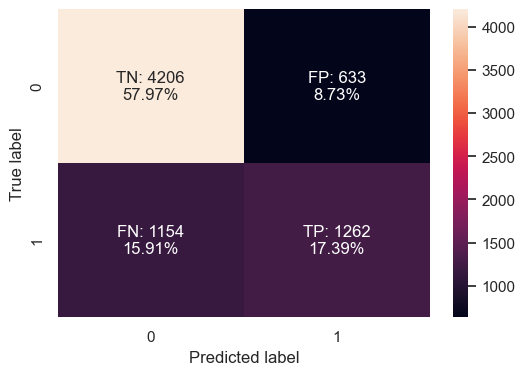

Testing performance:


Accuracy  Recall  Precision      F1
0   0.75369 0.52235    0.66596 0.58548

In [43]:
logit3_pvalues = sm.Logit(y_train, X_train_pvalues.astype(float))
lg3 = logit3_pvalues.fit(disp=False)

# Plot the confusion matrix for the training data
confusion_matrix_statsmodels(lg3, X_train_pvalues, y_train)

# Print the performance metrics for the new training data
print("Training performance:")
pvalues_performance_metrics_train = model_performance_classification_statsmodels(
    lg3, X_train_pvalues, y_train
)
display(pvalues_performance_metrics_train)

# Align the testing data with the reduced training data features (after removing high p-value variables)
X_test_pvalues = X_test_multicoll[X_train_pvalues.columns]

# Predict on the testing data and evaluate the model performance
# Plot the confusion matrix for the testing data
confusion_matrix_statsmodels(lg3, X_test_pvalues, y_test)

# Print the performance metrics for the testing data
print("Testing performance:")
pvalues_performance_metrics_test = model_performance_classification_statsmodels(
    lg3, X_test_pvalues, y_test
)
display(pvalues_performance_metrics_test)


In [44]:
X_train_final = X_train_pvalues
X_test_final = X_test_pvalues

# Building the logistic regression model
logit_final = logit3_pvalues
lg_final = logit_final.fit(disp=False)

print(lg_final.summary())


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29008
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.2094
Time:                        01:50:44   Log-Likelihood:                -14490.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_children                   0.3098      0.038      8.253      0.000       0.236       0.383
no_of_weekend_nights             0.0457      0.016      2.774      0.006     

Observations:

- Now that none of the categorical features has Hihg P-values > 0.05, we will consider the features in `X_train_final` as the final ones and `lg_final` as the final model.


#### Coefficient interpretations

- Coefficients of; `no_of_children`, `no_of_weekend_nights`, `lead_time`, `no_of_previous_cancellations`, `type_of_meal_plan_encoded`, and `room_type_reserved_encoded` are **positive**; an increase in these will lead to an increase in chances of a booking being cancelled.
- Coefficients of; `no_of_week_nights`, `required_car_parking_space`, `arrival_month`, `arrival_date`, `repeated_guest`, and `no_of_special_requests` are is **negative**; an increase in these will lead to a decrease in chances of a booking being cancelled.


#### Converting coefficients to odds

- The coefficients ($\beta$'s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
- Therefore, **$odds =  exp(\beta)$**
- The percentage change in odds is given as $(exp(\beta) - 1) * 100$


In [45]:
# converting coefficients to odds
odds = np.exp(lg_final.params)

# finding the percentage change
perc_change_odds = (np.exp(lg_final.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_final.columns
).T


no_of_children  no_of_weekend_nights  no_of_week_nights  \
Odds                1.36309               1.04680            0.94883   
Change_odd%        36.30887               4.67955           -5.11741   

             required_car_parking_space  lead_time  arrival_month  \
Odds                            0.29167    1.01159        0.87684   
Change_odd%                   -70.83330    1.15924      -12.31648   

             arrival_date  repeated_guest  no_of_previous_cancellations  \
Odds              0.97798         0.03397                       1.22039   
Change_odd%      -2.20164       -96.60299                      22.03925   

             no_of_special_requests  type_of_meal_plan_encoded  \
Odds                        0.37133                    1.16121   
Change_odd%               -62.86743                   16.12083   

             room_type_reserved_encoded  
Odds                            1.18269  
Change_odd%                    18.26885

Coefficient interpretation observations and explanations:

- **Positive Influence on Cancellation:**

  - `no_of_children`, `no_of_weekend_nights`, `lead_time`, `no_of_previous_cancellations`, `type_of_meal_plan_encoded`, and `room_type_reserved_encoded` all increase the odds of cancellation, meaning these factors make cancellations more likely as their values increase.

- **Negative Influence on Cancellation:**
  - `no_of_week_nights`, `required_car_parking_space`, `arrival_month`, `arrival_date`, `repeated_guest`, and `no_of_special_requests` all decrease the odds of cancellation, meaning these factors make cancellations less likely as their values increase.

Key Takeaways:

- `repeated_guest`: This has a very strong negative impact on the likelihood of cancellation, indicating that repeat guests are far less likely to cancel their bookings. This suggests the importance of fostering guest loyalty.

- `required_car_parking_space`: The requirement of a parking space is associated with a significant decrease in cancellation risk, potentially indicating a more committed travel plan.

- `no_of_children` and `no_of_weekend_nights`: Both of these are associated with an increased risk of cancellation, suggesting that family bookings and weekend stays might require more flexible cancellation policies or additional customer support to reduce the risk.


#### Model performance evaluation


##### Checking model performance on training set


True Negatives (TN): 16939
False Positives (FP): 2612
False Negatives (FN): 4472
True Positives (TP): 4997


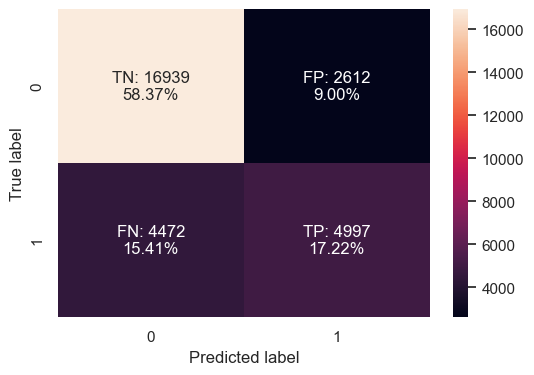

Training performance:


Accuracy  Recall  Precision      F1
0   0.75589 0.52772    0.65672 0.58520

In [46]:
# Plot the confusion matrix for the training data
confusion_matrix_statsmodels(lg_final, X_train_final, y_train)

# Print the performance metrics for the new training data
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg_final, X_train_final, y_train
)
display(log_reg_model_train_perf)


##### **ROC-AUC on Training Set**


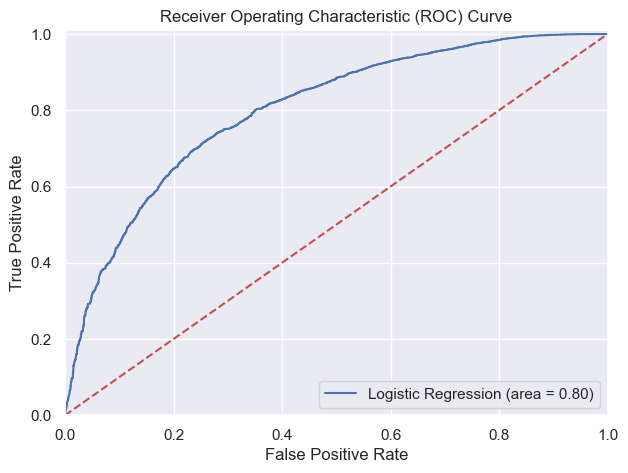

Train Set ROC-AUC: 0.8008376066777733


In [47]:
# Calculate ROC-AUC for the training set
logit_roc_auc_train = roc_auc_score(y_train, lg_final.predict(X_train_final))

# Get the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(X_train_final))

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("Train Set ROC-AUC:", logit_roc_auc_train)


**Interpretation of the ROC Curve and AUC (0.80)**

- ROC-AUC Score (0.80):
  - The ROC-AUC score of 0.80 is quite strong, indicating that the model has a good ability to distinguish between cancellations and non-cancellations. Specifically, an AUC of 0.80 means that there is an 80% chance that the model will rank a randomly chosen canceled booking higher than a randomly chosen non-canceled booking.
  - However, the confusion matrix and performance metrics suggest that while the model is good at ranking predictions, it struggles with recall (capturing actual cancellations).


##### Model Performance Improvement

- Since our aim is to increase F1, we will aim to find the optimal threshold where the difference between the True Positive Rate (TPR) and False Positive Rate (FPR) is maximized. This will balance the trade-offs between precision and recall therefore increasing F1.
- Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.


In [48]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(X_train_final))

# Find the optimal index where the difference between TPR and FPR is maximized
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold_auc_roc:.4f}")


Optimal Threshold: 0.3643


True Negatives (TN): 14555
False Positives (FP): 4996
False Negatives (FN): 2686
True Positives (TP): 6783


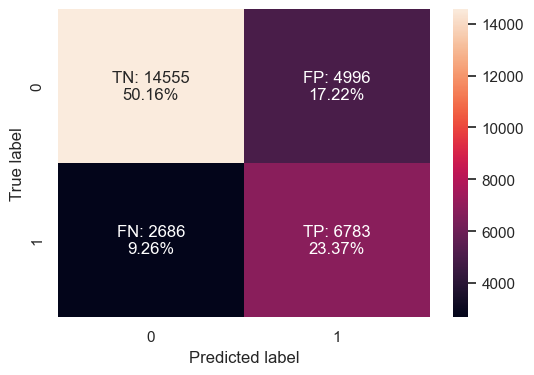

In [49]:
# Create the confusion matrix using the optimal threshold
confusion_matrix_statsmodels(
    lg_final, X_train_final, y_train, threshold=optimal_threshold_auc_roc
)


In [50]:
# Check the model performance with the new threshold
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg_final, X_train_final, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance with optimal threshold:")
display(log_reg_model_train_perf_threshold_auc_roc)


Training performance with optimal threshold:


Accuracy  Recall  Precision      F1
0   0.73529 0.71634    0.57586 0.63846

##### Let's use Precision-Recall curve and see if we can find a better threshold


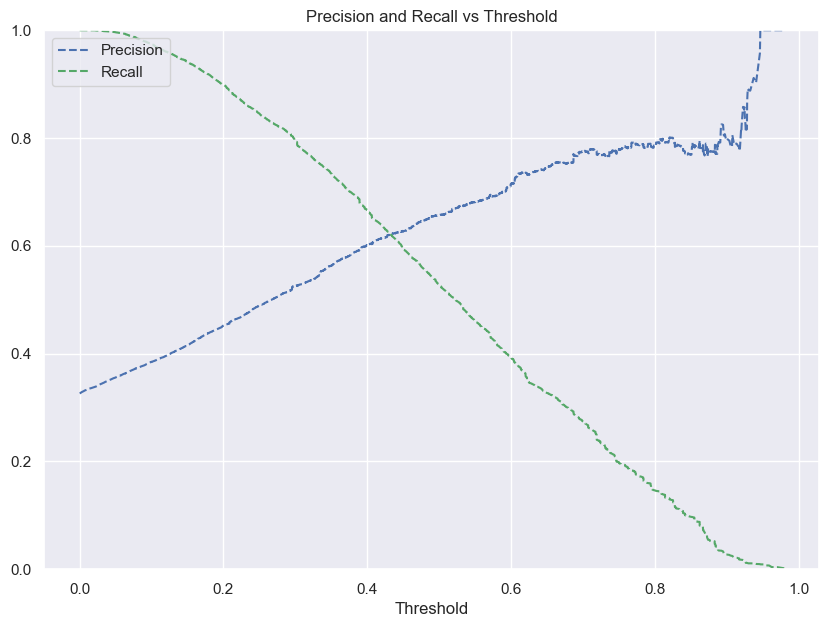

In [51]:
# Predict the probabilities on the training data
y_scores = lg_final.predict(X_train_final)

# Generate the precision, recall, and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores)


# Function to plot precision and recall against the thresholds
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.title("Precision and Recall vs Threshold")


# Plot the Precision-Recall curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


- At threshold around 0.62 we will get equal precision and recall but taking a step back and selecting value around 0.34 will provide a higher recall and a good precision.
- We can further confirm by using the following to find the threshold that gives the maximum F1 score.


In [52]:
# Calculate the F1 scores for each threshold
f1_scores = 2 * (prec * rec) / (prec + rec)

# Find the threshold that gives the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold_curve = tre[optimal_idx]
print("Optimal Threshold based on Precision-Recall Curve:", optimal_threshold_curve)


Optimal Threshold based on Precision-Recall Curve: 0.3463375314218031


True Negatives (TN): 14091
False Positives (FP): 5460
False Negatives (FN): 2465
True Positives (TP): 7004


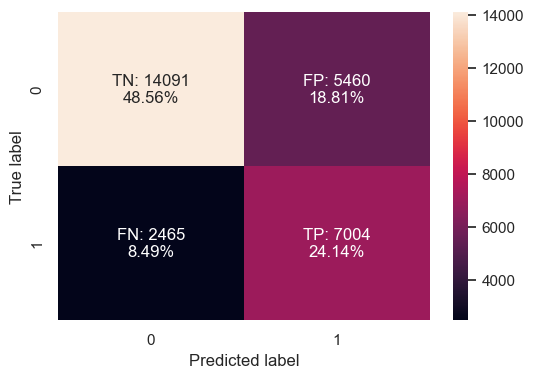

Training performance with optimal threshold from Precision-Recall curve:


Accuracy  Recall  Precision      F1
0   0.72691 0.73968    0.56194 0.63867

In [53]:
# Use the optimal threshold to create a confusion matrix
confusion_matrix_statsmodels(
    lg_final, X_train_final, y_train, threshold=optimal_threshold_curve
)

# Check the model performance with the new threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg_final, X_train_final, y_train, threshold=optimal_threshold_curve
)
print("Training performance with optimal threshold from Precision-Recall curve:")
display(log_reg_model_train_perf_threshold_curve)


**Observations:**

- **Increased Recall, Lower Precision**: The model's recall has increased significantly, meaning it catches most cancellations, but this has caused a drop in precision, leading to more false positives. This is a common trade-off when you adjust the threshold to prioritize recall over precision.

- **F1 Score Improvement**: The F1 score of 0.61989 reflects a balance that might be better than using the default threshold (usually 0.5). The F1 score improved by increasing the recall at the cost of precision. This might be desirable if the cost of missing a cancellation (False Negative) is high.

- **Threshold Impact**: By adjusting the threshold to the optimal value from the Precision-Recall curve, we have tailored the model's decision boundary to better suit the trade-off between precision and recall.


##### Checking model performance on test set


True Negatives (TN): 4206
False Positives (FP): 633
False Negatives (FN): 1154
True Positives (TP): 1262


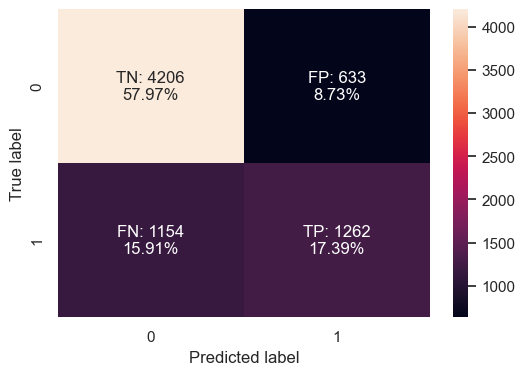

In [54]:
# Predict on the testing data and evaluate the model performance
# Plot the confusion matrix for the testing data
confusion_matrix_statsmodels(lg_final, X_test_final, y_test)


In [55]:
# Checking the model performance on the test set
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg_final, X_test_final, y_test
)

# Print the test set performance metrics
print("Test performance:")
display(log_reg_model_test_perf)


Test performance:


Accuracy  Recall  Precision      F1
0   0.75369 0.52235    0.66596 0.58548

Observations:

- **Consistency Between Training and Test Sets:** The model's performance on the test set is consistent with its performance on the training set, indicating that the model is generalizing well and not overfitting.
- **Balanced Performance:** The precision and recall values are balanced, suggesting the model is fairly reliable at predicting cancellations, though there is room for improvement, especially in recall (capturing more true cancellations).
- **Potential for Threshold Adjustment:** Since the model's recall is somewhat low, you may want to explore adjusting the threshold on the test set as you did on the training set to see if the F1 score can be further improved.


##### **ROC-AUC on Test Set**


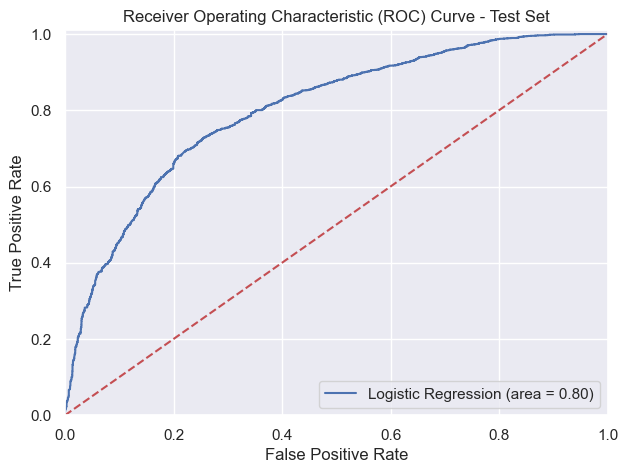

Test Set ROC-AUC: 0.8018190279996004


In [56]:
# Calculate ROC-AUC for the test set
logit_roc_auc_test = roc_auc_score(y_test, lg_final.predict(X_test_final))

# Get the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, lg_final.predict(X_test_final))

# Plot the ROC curve for the test set
plt.figure(figsize=(7, 5))
plt.plot(
    fpr_test, tpr_test, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test
)
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Test Set")
plt.legend(loc="lower right")
plt.show()

print("Test Set ROC-AUC:", logit_roc_auc_test)


##### Option 1: Adjust Threshold Using the Optimal Threshold Found in the Training Set (0.3643)


True Negatives (TN): 3509
False Positives (FP): 1330
False Negatives (FN): 624
True Positives (TP): 1792


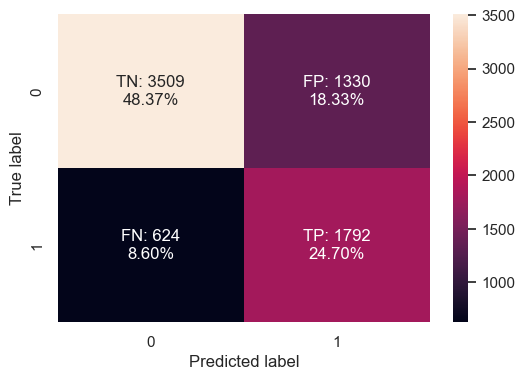

Test performance with optimal threshold from training set:


Accuracy  Recall  Precision      F1
0   0.73067 0.74172    0.57399 0.64717

In [57]:
# Use the optimal threshold found in the training phase
confusion_matrix_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_curve
)

# Check the model performance on the test set with the new threshold
log_reg_model_test_perf_threshold = model_performance_classification_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_curve
)

print("Test performance with optimal threshold from training set:")
display(log_reg_model_test_perf_threshold)


##### Option 2: Determine a New Optimal Threshold for the Test Set


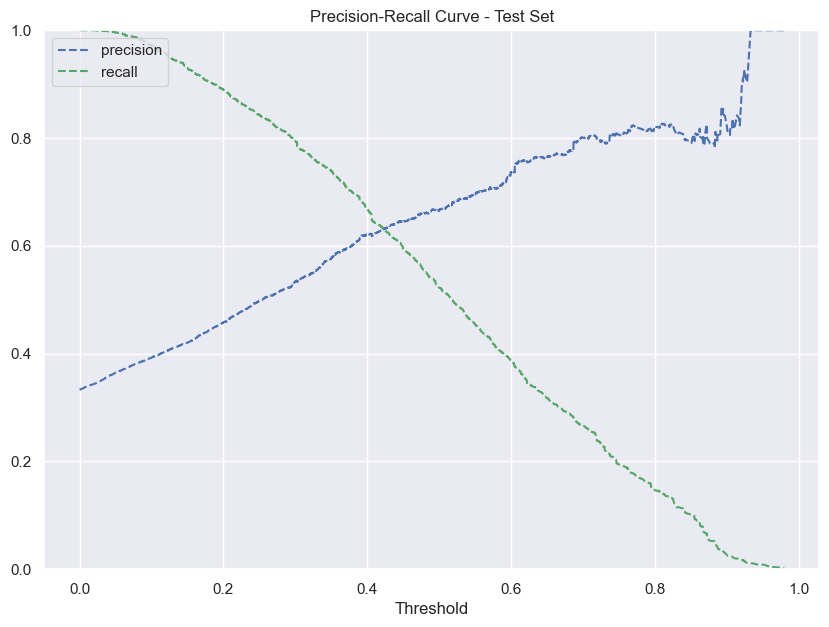

In [58]:
# Precision-Recall curve for test set
y_scores_test = lg_final.predict(X_test_final)
prec_test, rec_test, thresholds_test = precision_recall_curve(y_test, y_scores_test)


# Plot Precision-Recall curve
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec_test, rec_test, thresholds_test)
plt.title("Precision-Recall Curve - Test Set")
plt.show()


In [59]:
# Get the predicted probabilities for the test set
y_scores_test = lg_final.predict(X_test_final)

# Calculate precision, recall, and thresholds
prec_test, rec_test, thresholds_test = precision_recall_curve(y_test, y_scores_test)

# Calculate F1 scores for each threshold
f1_scores_test = 2 * (prec_test * rec_test) / (prec_test + rec_test)

# Find the threshold that gives the maximum F1 score
optimal_idx_test = np.argmax(f1_scores_test)
optimal_threshold_test = thresholds_test[optimal_idx_test]
print(
    "Optimal Threshold based on Precision-Recall Curve for Test Set:",
    optimal_threshold_test,
)


Optimal Threshold based on Precision-Recall Curve for Test Set: 0.3576726321099713


True Negatives (TN): 3602
False Positives (FP): 1237
False Negatives (FN): 658
True Positives (TP): 1758


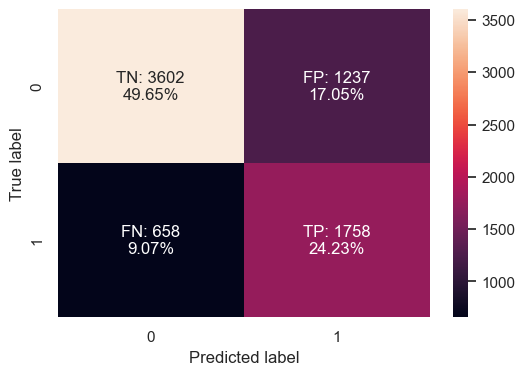

Test performance with optimal threshold from Precision-Recall curve on Test Set:


Accuracy  Recall  Precision      F1
0   0.73880 0.72765    0.58698 0.64979

In [60]:
# Use the new optimal threshold to create a confusion matrix for the test set
confusion_matrix_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_test
)

# Check the model performance on the test set with the new threshold
log_reg_model_test_perf_new_threshold = model_performance_classification_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_test
)

print(
    "Test performance with optimal threshold from Precision-Recall curve on Test Set:"
)
display(log_reg_model_test_perf_new_threshold)


Observations:

- **Option 2** seems to provide a slightly better overall balance, with a marginally higher accuracy, precision, and F1 score, even though recall is slightly lower. The improvement in precision and F1 score indicates that Option 2 might be more effective at reducing false positives while still maintaining a good level of recall.

- Based on the comparison, I will be using the optimal threshold determined directly from the test set (Option 2), as it offers a better overall performance, especially in terms of precision and F1 score.


#### Final Logistic Model Performance


#### Training performance comparison


In [61]:
# Define your threshold values
default_threshold_train = 0.5  # The default threshold for logistic regression
optimal_threshold_auc_roc_train = (
    optimal_threshold_auc_roc  # Example threshold from ROC-AUC
)
optimal_threshold_curve_train = (
    optimal_threshold_curve  # Example threshold from Precision-Recall
)

# Create a DataFrame comparing training performance metrics for different thresholds
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,  # Performance with the default threshold
        log_reg_model_train_perf_threshold_auc_roc.T,  # Performance with optimal threshold from ROC-AUC
        log_reg_model_train_perf_threshold_curve.T,  # Performance with optimal threshold from Precision-Recall
    ],
    axis=1,
)

# Rename columns to reflect the threshold used
models_train_comp_df.columns = [
    f"Logistic Regression-default Threshold ({default_threshold_train})",
    f"Logistic Regression-Threshold from ROC-AUC ({optimal_threshold_auc_roc_train})",
    f"Logistic Regression-Threshold from Precision-Recall ({optimal_threshold_curve_train})",
]

# Display the comparison
print("Training performance comparison:")
display(models_train_comp_df)


Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.75589   
Recall                                         0.52772   
Precision                                      0.65672   
F1                                             0.58520   

           Logistic Regression-Threshold from ROC-AUC (0.36428382207660154)  \
Accuracy                                             0.73529                  
Recall                                               0.71634                  
Precision                                            0.57586                  
F1                                                   0.63846                  

           Logistic Regression-Threshold from Precision-Recall (0.3463375314218031)  
Accuracy                                             0.72691                         
Recall                                               0.73968                         
Precision                                            0.56194                         
F1                                                   0.63867

#### Test performance comparison


In [62]:
# Define your threshold values
default_threshold_test = 0.5  # The default threshold for logistic regression
optimal_threshold_auc_roc_test = (
    optimal_threshold_curve  # Example threshold from ROC-AUC (if used for test set)
)
optimal_threshold_curve_test = optimal_threshold_test  # Example threshold from Precision-Recall (if used for test set)

# Create a DataFrame comparing test performance metrics for different thresholds
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,  # Performance with the default threshold
        log_reg_model_test_perf_threshold.T,  # Performance with optimal threshold from ROC-AUC
        log_reg_model_test_perf_new_threshold.T,  # Performance with optimal threshold from Precision-Recall
    ],
    axis=1,
)

# Rename columns to reflect the threshold used
models_test_comp_df.columns = [
    f"Logistic Regression-default Threshold ({default_threshold_test})",
    f"Logistic Regression-Threshold from ROC-AUC ({optimal_threshold_auc_roc_test})",
    f"Logistic Regression-Threshold from Precision-Recall ({optimal_threshold_curve_test})",
]

# Display the comparison
print("Test performance comparison:")
display(models_test_comp_df)


Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.75369   
Recall                                         0.52235   
Precision                                      0.66596   
F1                                             0.58548   

           Logistic Regression-Threshold from ROC-AUC (0.3463375314218031)  \
Accuracy                                             0.73067                 
Recall                                               0.74172                 
Precision                                            0.57399                 
F1                                                   0.64717                 

           Logistic Regression-Threshold from Precision-Recall (0.3576726321099713)  
Accuracy                                             0.73880                         
Recall                                               0.72765                         
Precision                                            0.58698                         
F1                                                   0.64979

**Observations:**

Threshold Selection:

- **Default Threshold**: The default threshold achieves the highest accuracy and precision; however, it does so at the expense of recall. This means the model misses a significant number of true cancellations.
- **Adjusted Thresholds**: Particularly those optimized using the Precision-Recall curve on the test set, offer a more balanced trade-off between recall and precision. This balance is reflected in higher F1 scores, indicating better overall model performance.

Generalization:

- **Model Consistency**: The model’s performance on the test set aligns closely with its performance on the training set, especially when using the adjusted thresholds. This consistency suggests that the model generalizes well to new, unseen data.

- **Optimal Threshold Selection**: Based on the F1 score, which balances precision and recall, the Test Set Optimal Threshold (derived from the Precision-Recall curve) is recommended for deployment. This threshold strikes a good compromise by reducing the risk of missing cancellations (false negatives) while maintaining a manageable number of false positives.

Business Implication:

- **Effective Cancellation Management**: Deploying the model with the Test Set Optimal Threshold can help the hotel chain manage cancellations more effectively. By balancing the risks of over-preparing (false positives) and under-preparing (false negatives) for guest cancellations, the hotel can optimize its resources and maintain customer satisfaction.


## 6. Decision Tree Model Building


### 6.1 Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.


In [63]:
# Separate features and target variable
X = dfmodeling.drop(["booking_status"], axis=1)
Y = dfmodeling["booking_status"]

# Encode categorical variables using pd.get_dummies()
X = pd.get_dummies(X, drop_first=True)

# Splitting data into train and test sets (70:30 split with random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [64]:
# Output the shapes and class distributions
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

print("\nPercentage of classes in training set:")
display(y_train.value_counts(normalize=True))

print("\nPercentage of classes in test set:")
display(y_test.value_counts(normalize=True))


Shape of Training set :  (25392, 29)
Shape of test set :  (10883, 29)

Percentage of classes in training set:


booking_status
Not_Canceled   0.67064
Canceled       0.32936
Name: proportion, dtype: float64


Percentage of classes in test set:


booking_status
Not_Canceled   0.67638
Canceled       0.32362
Name: proportion, dtype: float64

### 6.2 Decision Tree (default)


In [65]:
# Building the decision tree model
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

### 6.3 Model Evaluation Criterion

**Model can make wrong predictions as:**

- **False Negative (FN)**: Predicting that a booking will not be canceled when, in reality, it is canceled.
- **False Positive (FP)**: Predicting that a booking will be canceled when, in reality, it is not.

#### Which Case is More Important?

- **False Negatives (FN)**:

  - Revenue loss due to the inability to resell the room.
  - Operational costs for last-minute cancellations, such as increased commission fees or price drops to sell the room quickly.
  - Customer dissatisfaction if overbooking was done as a mitigation strategy and the hotel cannot accommodate all guests.

- **False Positives (FP)**:
  - Underpreparing for the guest's arrival, leading to potential customer dissatisfaction.
  - Incurring unnecessary operational adjustments, such as reallocating resources or staff.

#### How to Reduce the Losses?

- **Focus on F1 Score**:

  - The hotel should aim to maximize the F1 Score, a balanced metric that considers both precision (reducing false positives) and recall (reducing false negatives). By focusing on F1, the model aims to minimize the overall impact of both types of errors.

- **Balanced Approach**:

  - Given the importance of both types of errors (False Negatives leading to revenue loss and False Positives leading to operational inefficiencies), the F1 Score offers a balanced approach to optimize the model's performance.

- **Threshold Adjustment**:
  - Fine-tuning the decision threshold based on the F1 Score can help strike the right balance between precision and recall, minimizing the combined impact of false positives and false negatives.


### 6.4 Streamlining Model Evaluation with Functions

- **Creating Functions**: To enhance efficiency and avoid repetitive code, let's create functions that will calculate various metrics and generate a confusion matrix for each model.
  - **`model_performance_classification_sklearn` Function**: This function will be used to evaluate the performance of our models, providing key metrics that help assess their effectiveness.
  - **`confusion_matrix_sklearn` Function**: This function will be used to plot the confusion matrix, allowing us to visualize the types of errors our models are making and identify areas for improvement.


In [66]:
# Convert y_train and y_test to numeric labels
y_train_numeric = y_train.map({"Canceled": 1, "Not_Canceled": 0})
y_test_numeric = y_test.map({"Canceled": 1, "Not_Canceled": 0})


In [67]:
# Function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Convert predictions to numeric format if they are not already
    pred_numeric = pd.Series(pred).map({"Canceled": 1, "Not_Canceled": 0})

    # Calculate performance metrics
    acc = accuracy_score(target, pred_numeric)  # Compute Accuracy
    recall = recall_score(target, pred_numeric)  # Compute Recall
    precision = precision_score(target, pred_numeric)  # Compute Precision
    f1 = f1_score(target, pred_numeric)  # Compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [68]:
# Function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages.

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict using the model
    y_pred = model.predict(predictors)

    # Convert predictions to numeric format
    y_pred_numeric = pd.Series(y_pred).map({"Canceled": 1, "Not_Canceled": 0})

    # Generate the confusion matrix
    cm = confusion_matrix(target, y_pred_numeric)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


#### Checking model performance on training set


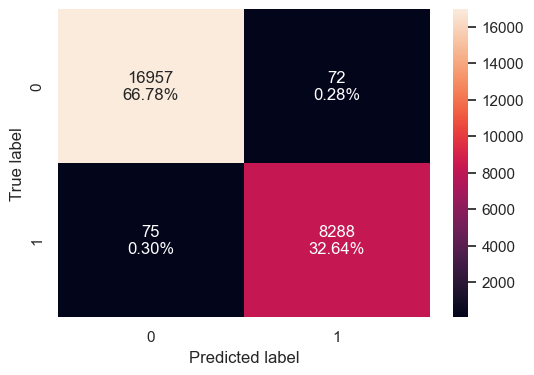

Decision Tree Model Performance on Training Set:


Accuracy  Recall  Precision      F1
0   0.99421 0.99103    0.99139 0.99121

In [69]:
# Create the confusion matrix for the training data using the numeric labels
confusion_matrix_sklearn(model0, X_train, y_train_numeric)

# Evaluate the model performance on the training data with numeric labels
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train_numeric
)

# Display the training performance metrics
print("Decision Tree Model Performance on Training Set:")
display(decision_tree_perf_train)


#### Checking model performance on test set


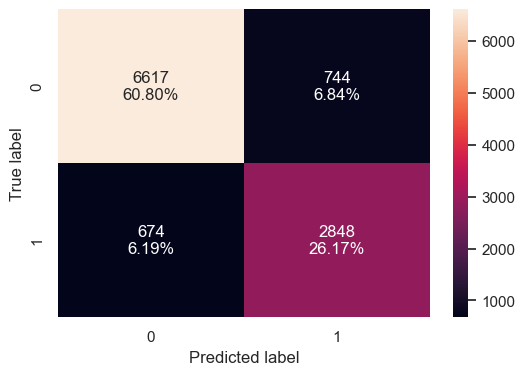

Decision Tree Model Performance on Test Set:


Accuracy  Recall  Precision      F1
0   0.86971 0.80863    0.79287 0.80067

In [70]:
# Create the confusion matrix for the test data using the numeric labels
confusion_matrix_sklearn(model0, X_test, y_test_numeric)

# Evaluate the model performance on the test data with numeric labels
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test_numeric
)

# Display the test performance metrics
print("Decision Tree Model Performance on Test Set:")
display(decision_tree_perf_test)


Observations:

- Overfitting: The model performs exceptionally well on the training set with near-perfect metrics, indicating potential overfitting. This is where the model might be capturing noise in the training data as if it were a pattern, leading to less generalized performance on unseen data.

- Generalization to Test Set: While the test set performance is still strong, the drop in metrics (especially accuracy and precision) compared to the training set suggests that the model might not generalize as well as expected. However, an F1 score of ~80.07% on the test set is still quite good, indicating that the model is effectively balancing precision and recall.


#### Do we need to prune the tree?


**Yes. To combat overfitting, we will be pruning the decision tree to simplify the model and improve its generalization ability.**


Assessing Important Features


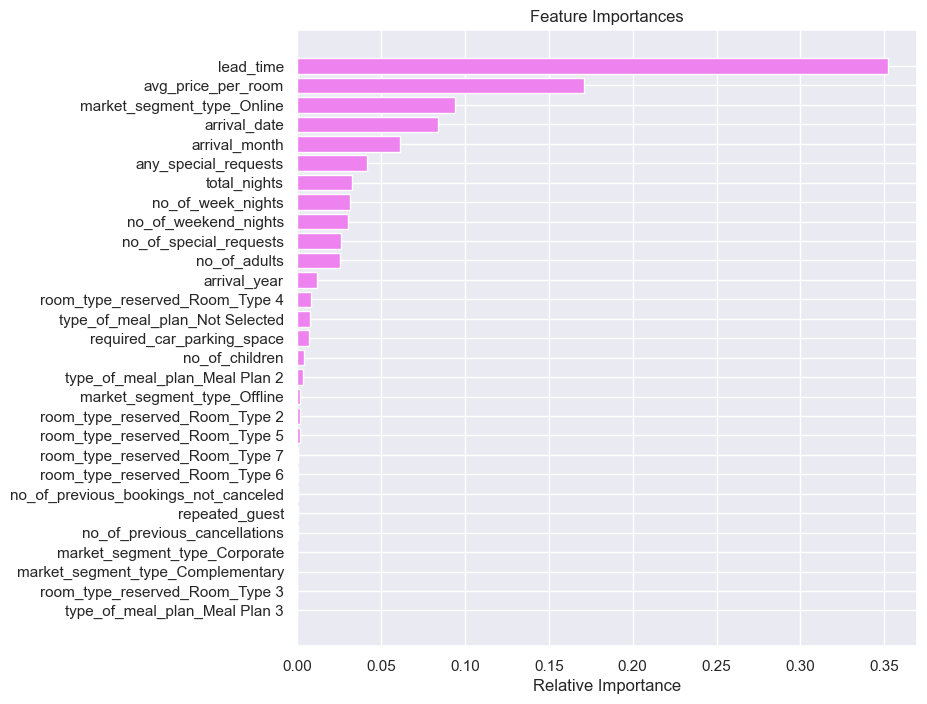

In [71]:
# Get feature names from the training set
feature_names = list(X_train.columns)

# Get feature importances from the model
importances = model0.feature_importances_

# Sort the feature importances in ascending order
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Observations:

- `Lead Time`: This feature is the most significant, contributing the highest relative importance. It suggests that the number of days between booking and arrival date strongly influences whether a booking is canceled.
- `Average Price per Room`: The second most important feature, indicating that the room's average price also plays a crucial role in predicting cancellations. Higher or lower room prices may correlate with different cancellation behaviors.
- `Market Segment Type - Online`: This feature has a significant impact, suggesting that bookings made through online channels are particularly important in predicting cancellations.
- `Arrival Date and Month`: These features also show considerable importance, indicating that the specific timing of the booking influences the likelihood of cancellation.
- `Any Special Requests`: Guests who make special requests also have a noticeable impact on the model, perhaps indicating specific customer behaviors related to cancellations.
- Other Features: Features like the number of weekend nights, weeknights, total nights, and specific room types have lower but still relevant importance.


### 6.5 Pruning the Tree


#### Pre-pruning the Tree


**Using GridSearch for Hyperparameter tuning of our tree model**

- Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.


In [72]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),  # Depth of the tree
    "max_leaf_nodes": [50, 75, 150, 250],  # Maximum number of leaf nodes
    "min_samples_split": [
        10,
        30,
        50,
        70,
    ],  # Minimum number of samples required to split an internal node
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(
    f1_score, pos_label="Canceled"
)  # F1 score focusing on the "Canceled" class

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
best_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set


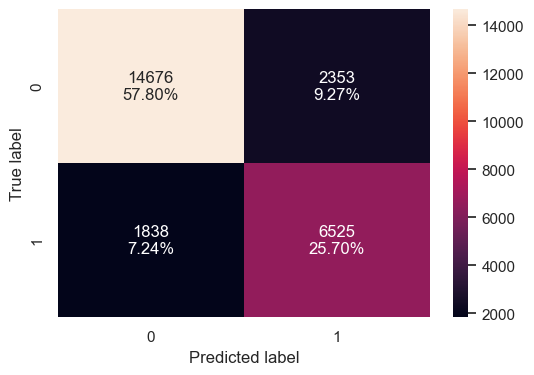

Pruned Decision Tree Model Performance on Training Set:


Accuracy  Recall  Precision      F1
0   0.83495 0.78022    0.73496 0.75692

In [73]:
# Checking performance on the training set
confusion_matrix_sklearn(best_estimator, X_train, y_train_numeric)

# Evaluating the model performance on the training data
decision_tree_pruned_perf_train = model_performance_classification_sklearn(
    best_estimator, X_train, y_train_numeric
)

# Displaying the training performance metrics
print("Pruned Decision Tree Model Performance on Training Set:")
display(decision_tree_pruned_perf_train)


#### Checking performance on test set


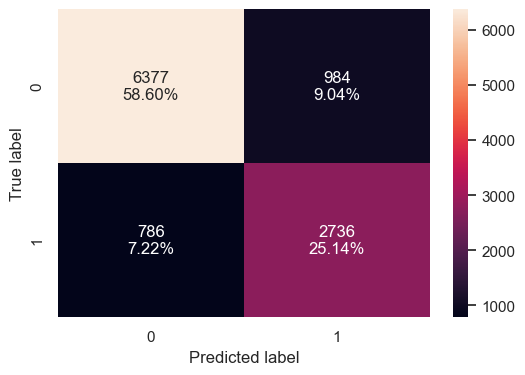

Pruned Decision Tree Model Performance on Test Set:


Accuracy  Recall  Precision      F1
0   0.83736 0.77683    0.73548 0.75559

In [74]:
# Checking performance on the test set
confusion_matrix_sklearn(best_estimator, X_test, y_test_numeric)

# Evaluating the model performance on the test data
decision_tree_pruned_perf_test = model_performance_classification_sklearn(
    best_estimator, X_test, y_test_numeric
)

# Displaying the test performance metrics
print("Pruned Decision Tree Model Performance on Test Set:")
display(decision_tree_pruned_perf_test)


**Observations**:

- **Consistency**: The pruned decision tree shows very similar performance on both the training and test sets, indicating good generalization and avoiding overfitting. The accuracy, recall, precision, and F1 scores are all closely aligned across both datasets.
- **Balanced Trade-off**: The F1 score is quite balanced, with values close to 76% on both sets. This suggests that the pruned decision tree maintains a good balance between precision and recall, which is important when F1 is your evaluation metric.
- **Improvement over Initial Model**: The pruning process has likely resulted in a simpler model with better generalization abilities. Compared to the unpruned model, the pruned model avoids overly complex decision rules that might not generalize well to unseen data.


### 6.6 Model Visualization


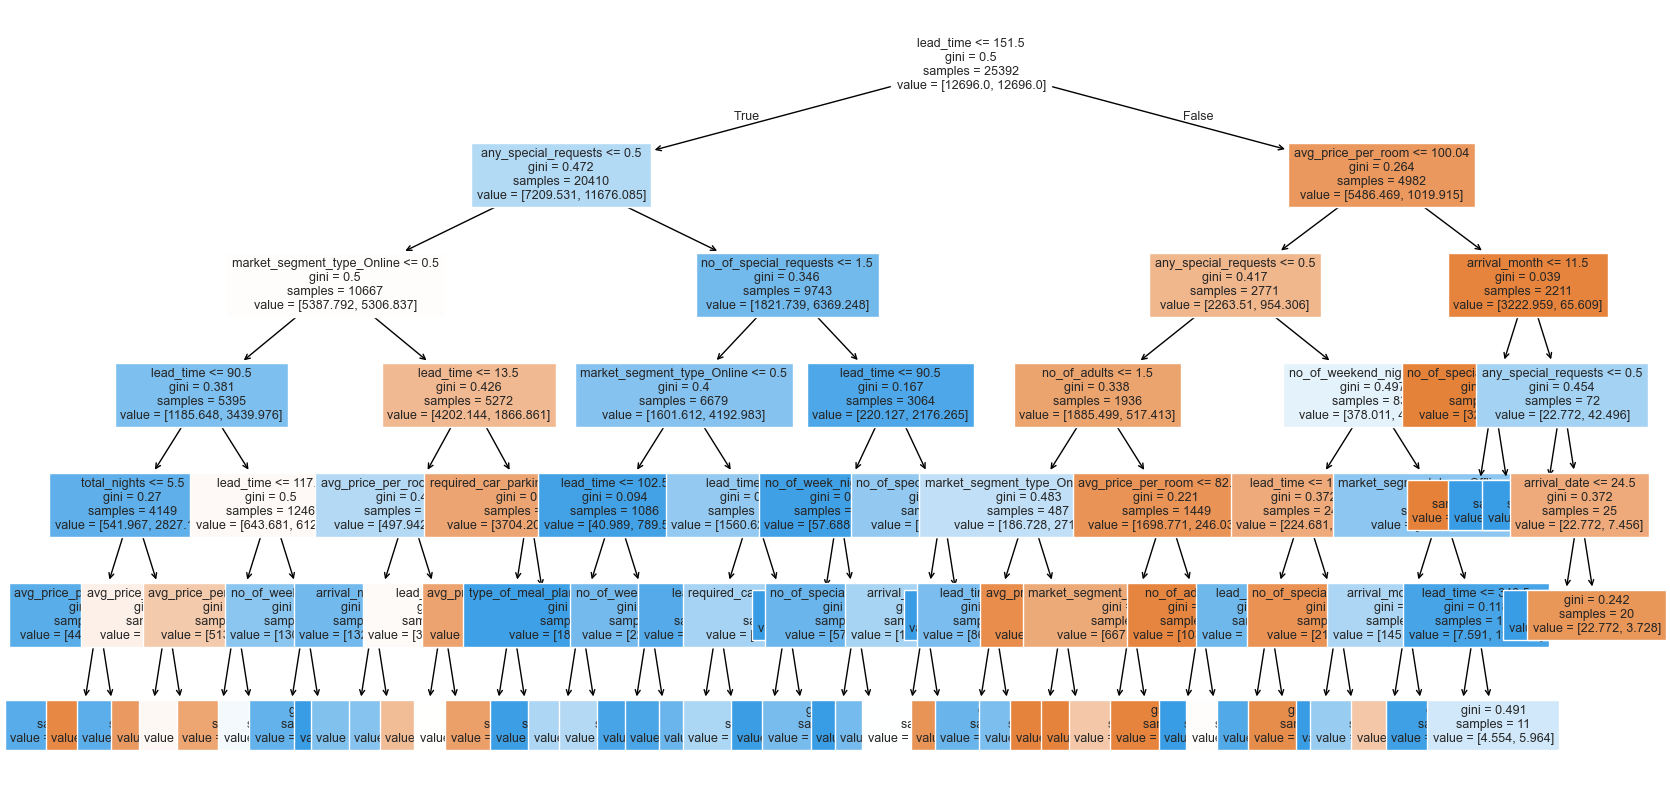

In [75]:
# Visualizing the pre-pruned decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    best_estimator,
    feature_names=X_train.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# Add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()


In [76]:
# Text report showing the rules of the decision tree
print(
    tree.export_text(
        best_estimator, feature_names=list(X_train.columns), show_weights=True
    )
)


|--- lead_time <= 151.50
|   |--- any_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- total_nights <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- weights: [419.00, 2739.90] class: Not_Canceled
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [25.81, 1.49] class: Canceled
|   |   |   |   |--- total_nights >  5.50
|   |   |   |   |   |--- avg_price_per_room <= 92.80
|   |   |   |   |   |   |--- weights: [12.14, 68.59] class: Not_Canceled
|   |   |   |   |   |--- avg_price_per_room >  92.80
|   |   |   |   |   |   |--- weights: [85.01, 17.15] class: Canceled
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [227.72, 214.72] class: Canceled
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |  

Observations:

- The tree structure shows the importance of the `lead_time`, `avg_price_per_room`, and `any_special_requests` features, among others. These features are repeatedly used to make splits, indicating their significant role in predicting booking cancellations.


In [77]:
# Display the importances
importances = best_estimator.feature_importances_
print(importances)


[0.02702997 0.         0.01243347 0.00702817 0.01415876 0.4676694
 0.         0.01418297 0.00076349 0.         0.         0.
 0.08210707 0.03096242 0.00839254 0.13891175 0.         0.
 0.00095344 0.         0.         0.         0.         0.
 0.         0.         0.         0.01004782 0.18535873]


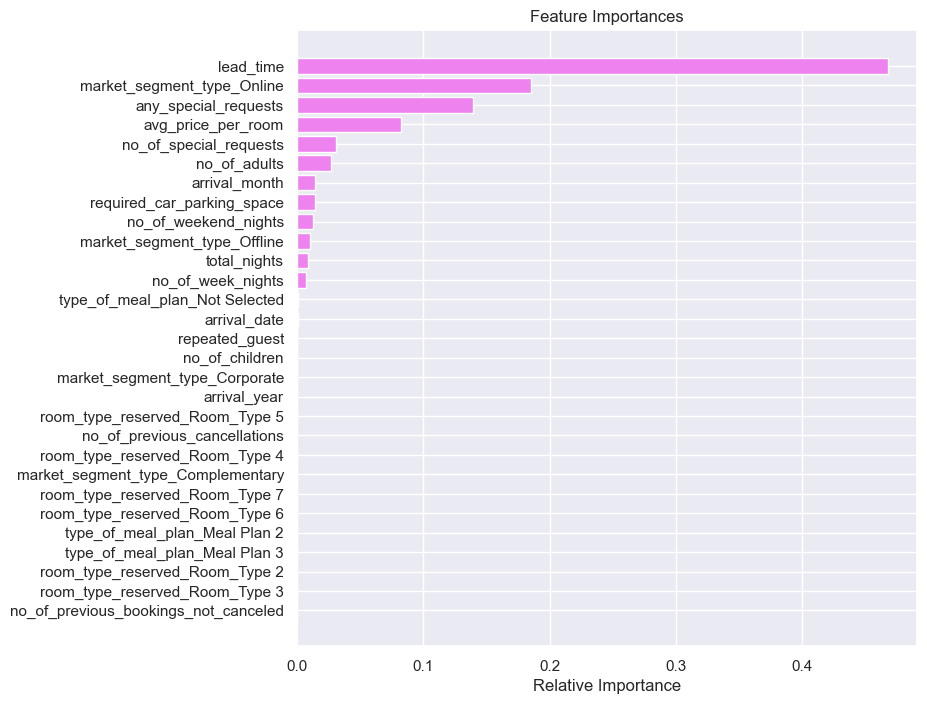

In [78]:
# Get the importance of each feature in the decision tree
importances = best_estimator.feature_importances_
indices = np.argsort(importances)

# Plotting the feature importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- It appears that our tree is being simplified based on the new important features


### 6.7 Cost Complexity Pruning

- The `DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.


**Total impurity of leaves vs effective alphas of pruned tree**

- Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of `ccp_alpha` could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.


In [79]:
# Initialize the classifier (ensure consistency with your previous settings)
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train_numeric)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

# Display the pruning path data
pruning_path_df = pd.DataFrame({"Alpha": ccp_alphas, "Total Impurity": impurities})
display(pruning_path_df)


Alpha  Total Impurity
0    0.00000         0.00838
1    0.00000         0.00838
2    0.00000         0.00838
3    0.00000         0.00838
4    0.00000         0.00838
...      ...             ...
1841 0.00890         0.32806
1842 0.00980         0.33786
1843 0.01272         0.35058
1844 0.03412         0.41882
1845 0.08118         0.50000

[1846 rows x 2 columns]

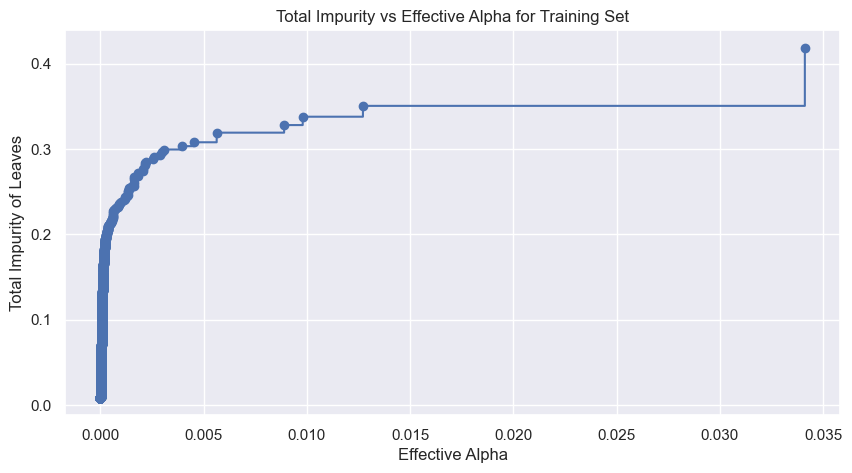

In [80]:
# Plot the total impurity vs effective alpha
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()


Observations:

- **Left Side (Low Alpha)**: The tree is complex, with many leaves. The total impurity is low, but the model might be overfitting.
- **Right Side (High Alpha)**: The tree is pruned more aggressively. The total impurity increases, indicating a simpler tree with fewer leaves, which may lead to underfitting.


Next, we train a decision tree using effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.


In [81]:
# Initialize list to store decision trees trained with different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train_numeric)
    clfs.append(clf)

# Print out the number of nodes in the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137282


For the remainder, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.


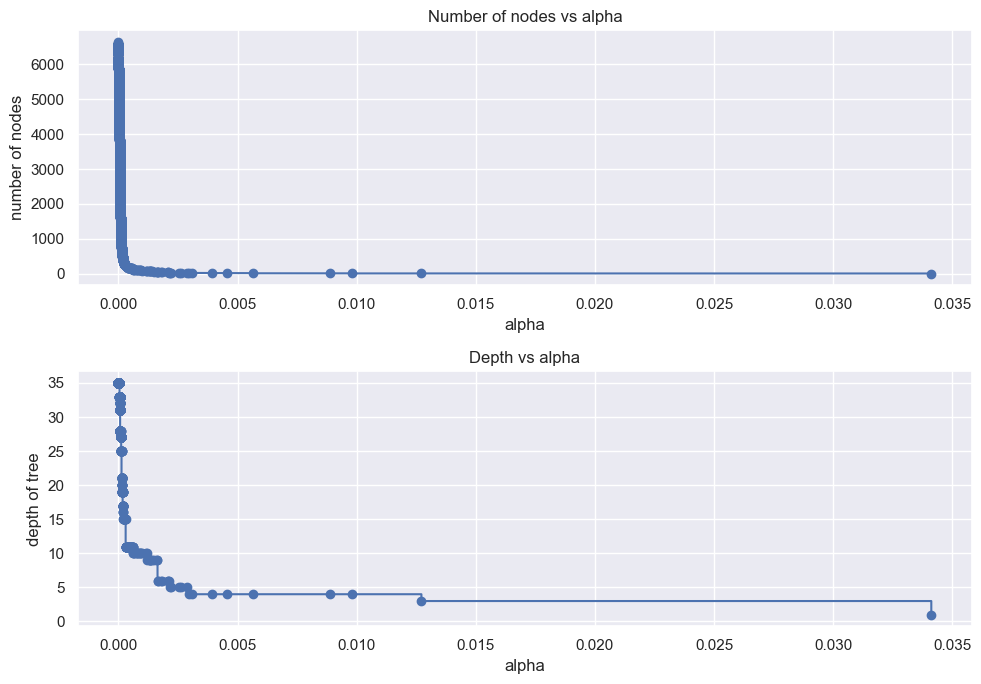

In [82]:
# Remove the trivial tree with only one node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Calculate the number of nodes and the depth for each tree
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()
plt.show()


**Number of Nodes vs Alpha**

- As the value of alpha increases, the number of nodes in the tree decreases significantly, which is expected because higher alpha values lead to more aggressive pruning.
- The number of nodes stabilizes after a certain point (around alpha > 0.004), meaning that further increasing alpha doesn't significantly reduce the number of nodes.

**Depth vs Alpha**

- Similarly, the depth of the tree decreases rapidly as alpha increases, stabilizing after alpha > 0.004.
  This stabilization suggests that beyond a certain alpha, the tree doesn't become much simpler in terms of depth.


### 6.8 F1 Score vs alpha for training and testing sets


In [83]:
# Calculate F1 Scores for training and testing sets
f1_train = []
f1_test = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    f1_train.append(f1_score(y_train_numeric, pred_train))

    pred_test = clf.predict(X_test)
    f1_test.append(f1_score(y_test_numeric, pred_test))


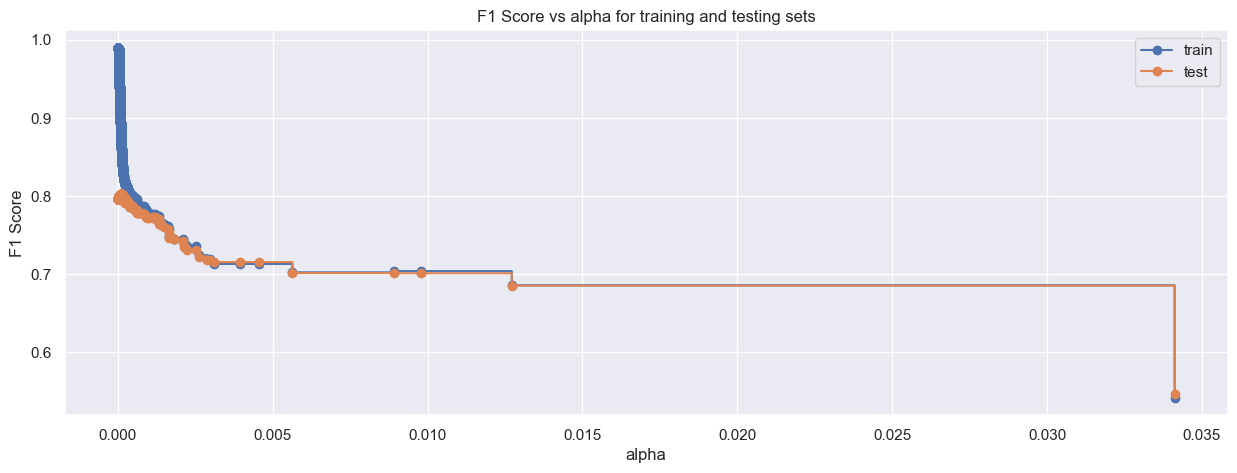

In [84]:
# Plot F1 Score vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [85]:
# Find the best alpha (the one that gives the highest F1 score on the test set)
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print("Best alpha:", ccp_alphas[index_best_model])
print("Best Decision Tree Model:", best_model)


Best alpha: 0.00010671446444450493
Best Decision Tree Model: DecisionTreeClassifier(ccp_alpha=0.00010671446444450493,
                       class_weight='balanced', random_state=1)


### 6.9 Checking performance on Training and Test set


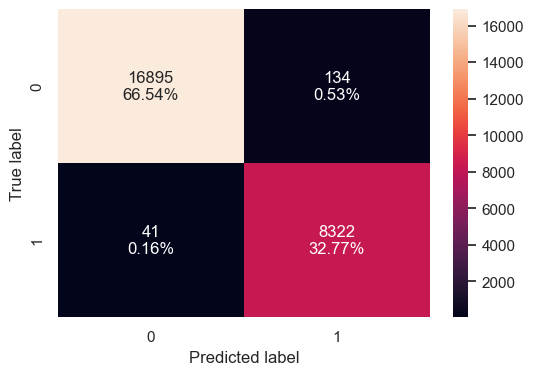

Decision Tree Model Performance on Training Set (Unpruned):


Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

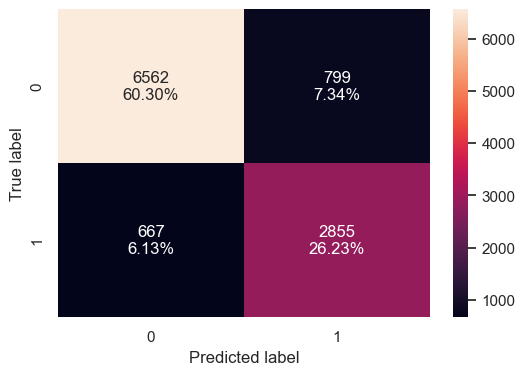

Decision Tree Model Performance on Test Set (Unpruned):


Accuracy  Recall  Precision      F1
0   0.86529 0.81062    0.78134 0.79571

In [86]:
# Refit the best model without using the ccp_alpha parameter
best_model_unpruned = DecisionTreeClassifier(random_state=1, class_weight="balanced")
best_model_unpruned.fit(X_train, y_train)

# Check performance on the training set
confusion_matrix_sklearn(best_model_unpruned, X_train, y_train_numeric)
decision_tree_perf_train_unpruned = model_performance_classification_sklearn(
    best_model_unpruned, X_train, y_train_numeric
)
print("Decision Tree Model Performance on Training Set (Unpruned):")
display(decision_tree_perf_train_unpruned)

# Check performance on the test set
confusion_matrix_sklearn(best_model_unpruned, X_test, y_test_numeric)
decision_tree_perf_test_unpruned = model_performance_classification_sklearn(
    best_model_unpruned, X_test, y_test_numeric
)
print("Decision Tree Model Performance on Test Set (Unpruned):")
display(decision_tree_perf_test_unpruned)


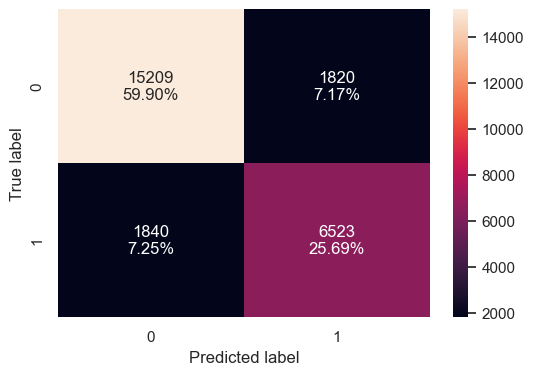

Decision Tree Model Performance on Training Set (Fixed Alpha):
   Accuracy  Recall  Precision      F1
0   0.85586 0.77998    0.78185 0.78092


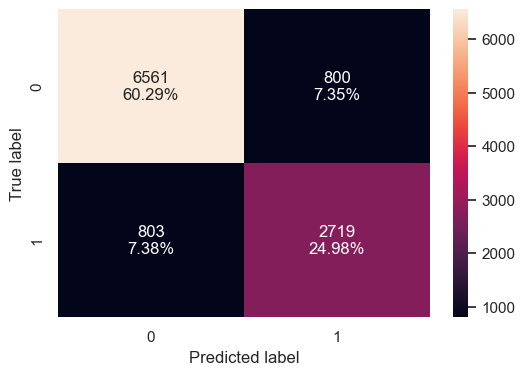

Decision Tree Model Performance on Test Set (Fixed Alpha):
   Accuracy  Recall  Precision      F1
0   0.85271 0.77200    0.77266 0.77233


In [87]:
# Set a fixed alpha value for pruning (choose a reasonable small value)
fixed_alpha = 0.001  # You can adjust this value based on your data

# Refit the decision tree with this fixed alpha
best_model_fixed_alpha = DecisionTreeClassifier(
    random_state=1, ccp_alpha=fixed_alpha, class_weight="balanced"
)
best_model_fixed_alpha.fit(X_train, y_train)

# Check performance on the training set
confusion_matrix_sklearn(best_model_fixed_alpha, X_train, y_train_numeric)
decision_tree_perf_train_fixed_alpha = model_performance_classification_sklearn(
    best_model_fixed_alpha, X_train, y_train_numeric
)
print("Decision Tree Model Performance on Training Set (Fixed Alpha):")
print(decision_tree_perf_train_fixed_alpha)

# Check performance on the test set
confusion_matrix_sklearn(best_model_fixed_alpha, X_test, y_test_numeric)
decision_tree_perf_test_fixed_alpha = model_performance_classification_sklearn(
    best_model_fixed_alpha, X_test, y_test_numeric
)
print("Decision Tree Model Performance on Test Set (Fixed Alpha):")
print(decision_tree_perf_test_fixed_alpha)


In [88]:
# Verify that there are no NaNs in the feature sets
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

# Verify the integrity of y_train and y_test
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


NaNs in X_train: 0
NaNs in X_test: 0
Unique values in y_train: ['Canceled' 'Not_Canceled']
Unique values in y_test: ['Not_Canceled' 'Canceled']


## Model Performance Comparison and Conclusions


In [89]:
# Compare the performance of models
model_comparison_df = pd.concat(
    [
        decision_tree_perf_train_unpruned.T,  # Pre-pruned Decision Tree
        decision_tree_perf_train_fixed_alpha.T,  # Post-pruned Decision Tree
        log_reg_model_train_perf.T,  # Logistic Regression (from earlier)
    ],
    axis=1,
)
model_comparison_df.columns = [
    "Pre-pruned Decision Tree",
    "Post-pruned Decision Tree",
    "Logistic Regression",
]
print("Model Performance Comparison:")
display(model_comparison_df)


Model Performance Comparison:


Pre-pruned Decision Tree  Post-pruned Decision Tree  \
Accuracy                    0.99311                    0.85586   
Recall                      0.99510                    0.77998   
Precision                   0.98415                    0.78185   
F1                          0.98960                    0.78092   

           Logistic Regression  
Accuracy               0.75589  
Recall                 0.52772  
Precision              0.65672  
F1                     0.58520

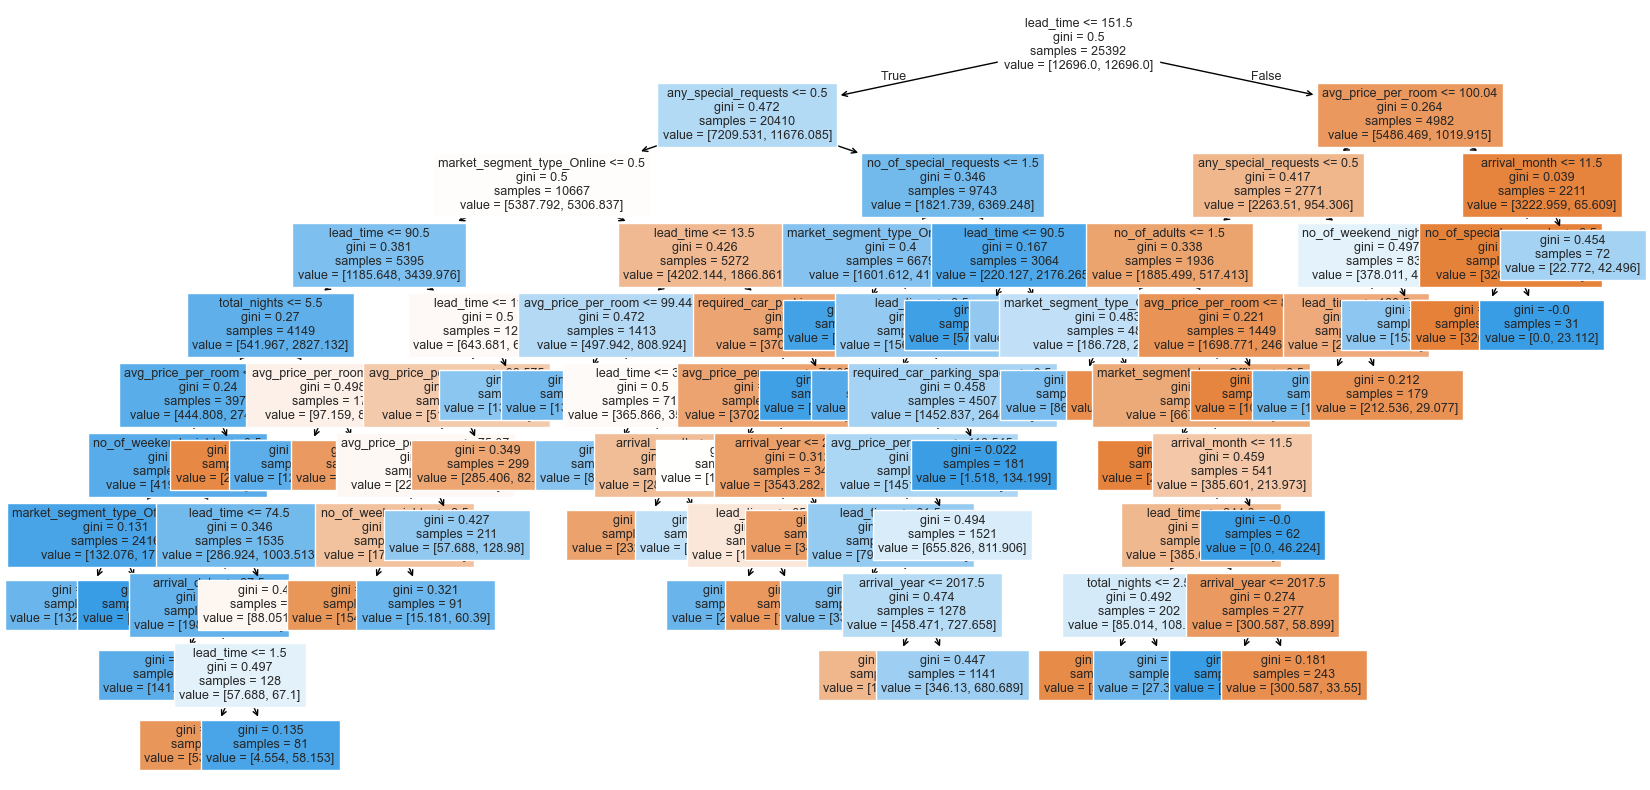

|--- lead_time <= 151.50
|   |--- any_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- total_nights <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [132.08, 536.80] class: Not_Canceled
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1199.59] class: Not_Canceled
|   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |   |--- weights: [141.18, 854.40] class: Not_Canceled
|   |   |   |   |   |   |   |   |--- arrival_date >  27.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   | 

In [90]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    best_model_fixed_alpha,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Print the rules of the pruned decision tree
print(
    tree.export_text(
        best_model_fixed_alpha, feature_names=feature_names, show_weights=True
    )
)


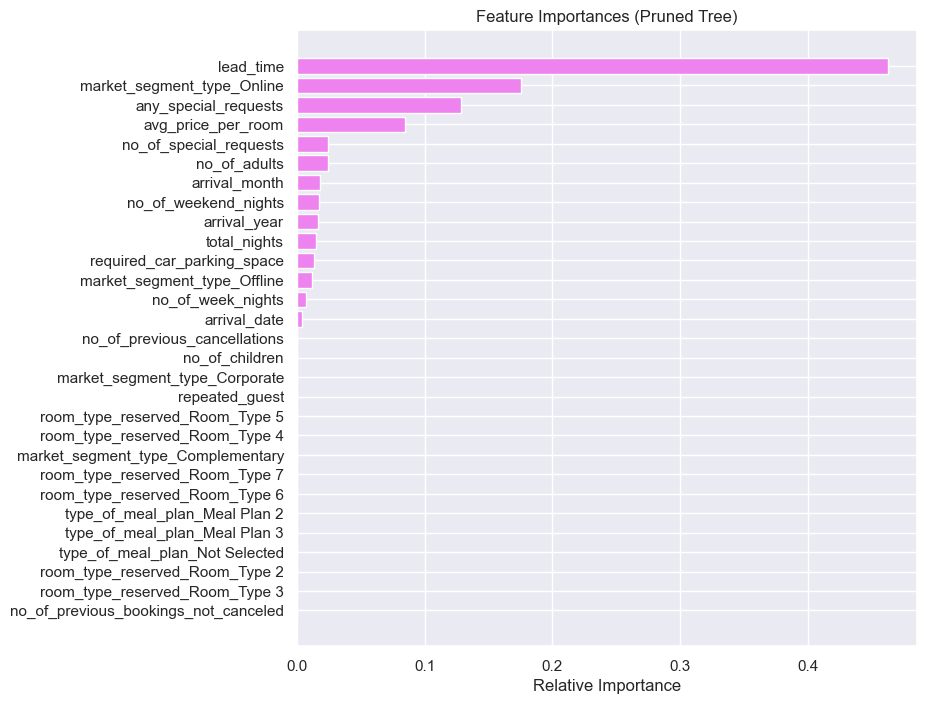

In [91]:
importances = best_model_fixed_alpha.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances (Pruned Tree)")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?


#### 1. **Lead Time is the Most Significant Factor**
   - **Insight**: The analysis consistently shows that lead time is the most influential factor in predicting booking cancellations. The longer the lead time, the higher the probability of cancellation.
   - **Recommendation**: The hotel should consider implementing stricter cancellation policies for bookings made far in advance. For example, bookings with a lead time greater than a certain threshold (e.g., 60 days) could require a non-refundable deposit or a stricter cancellation policy to reduce the risk of last-minute cancellations.

#### 2. **Special Requests as a Predictor**
   - **Insight**: Special requests were identified as significant predictors of cancellations. Customers who make special requests may have specific expectations and may be more likely to cancel if these expectations are not met.
   - **Recommendation**: The hotel could implement a follow-up process for guests with special requests to ensure their needs are met, potentially reducing the likelihood of cancellations. Additionally, offering incentives for guests with special requests to finalize their booking (e.g., discounts on additional services) could help reduce cancellations.

#### 3. **Market Segment Type**
   - **Insight**: The market segment type, particularly online bookings, has a substantial impact on the likelihood of cancellations.
   - **Recommendation**: The hotel could create tailored cancellation policies based on the booking channel. For example, stricter policies could be applied to online bookings where the cancellation rate is higher, while more flexible policies could be offered for bookings made directly through the hotel's website or via phone.

#### 4. **Price Sensitivity**
   - **Insight**: Rooms with lower prices tend to have a higher likelihood of being canceled, indicating price-sensitive customers.
   - **Recommendation**: Implement a tiered pricing structure where non-refundable rates are offered at a lower price point, while fully refundable rates are priced higher. This approach can cater to both price-sensitive customers and those who prefer flexibility, balancing the risk of cancellations with revenue protection.

#### 5. **Profitable Cancellation and Refund Policies**
   - **Non-refundable Rates**: Introduce non-refundable rates at a lower price point to attract customers who are certain about their travel plans. This could be coupled with a small incentive, such as a discount on future bookings.
   - **Flexible Rates with Conditions**: Offer flexible cancellation rates with conditions such as a minimum lead time for cancellations to qualify for a full refund. For instance, bookings canceled within 14 days of the check-in date might receive only a partial refund.
   - **Dynamic Cancellation Policies**: Implement dynamic cancellation policies that adjust based on lead time and the market segment. For example, bookings made via online platforms with a lead time of over 30 days might have stricter cancellation terms compared to direct bookings.

#### 6. **Other Recommendations**
   - **Enhanced Customer Engagement**: For bookings with a higher likelihood of cancellation, such as those made with a long lead time, consider implementing engagement strategies like pre-stay emails or offers to encourage guests to maintain their reservations.
   - **Data-Driven Decision Making**: Continuously monitor and analyze booking patterns and cancellation rates. Use this data to refine and optimize cancellation policies regularly. Consider deploying machine learning models that can predict cancellations more accurately and provide personalized recommendations to customers at the time of booking.
   - **Offer Insurance Options**: Provide guests with the option to purchase travel insurance that covers cancellations. This could be an additional revenue stream for the hotel while also providing peace of mind to customers.

These recommendations aim to reduce the financial impact of cancellations on the hotel while maintaining customer satisfaction and loyalty. By leveraging the insights from the decision tree model and other analyses, the hotel can implement strategies that protect revenue and enhance the overall guest experience.


## <a id="Appendix"></a> Appendix: Detailed Exploratory Data Analysis (EDA)</a>


### <a id="univariate-analysis"></a>3.1 Univariate Analysis


Univariate analysis involves:

- Plotting histograms or bar charts for categorical variables to visualize their frequency distributions.
- Plotting histograms or box plots for numerical variables to understand their central tendency and dispersion.


#### <a id="analysis-of-numerical-features"></a>3.1.1 Analysis of Numerical Features


Distribution of 'no_of_adults'
count   36275.00000
mean        1.84496
std         0.51871
min         0.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: no_of_adults, dtype: float64


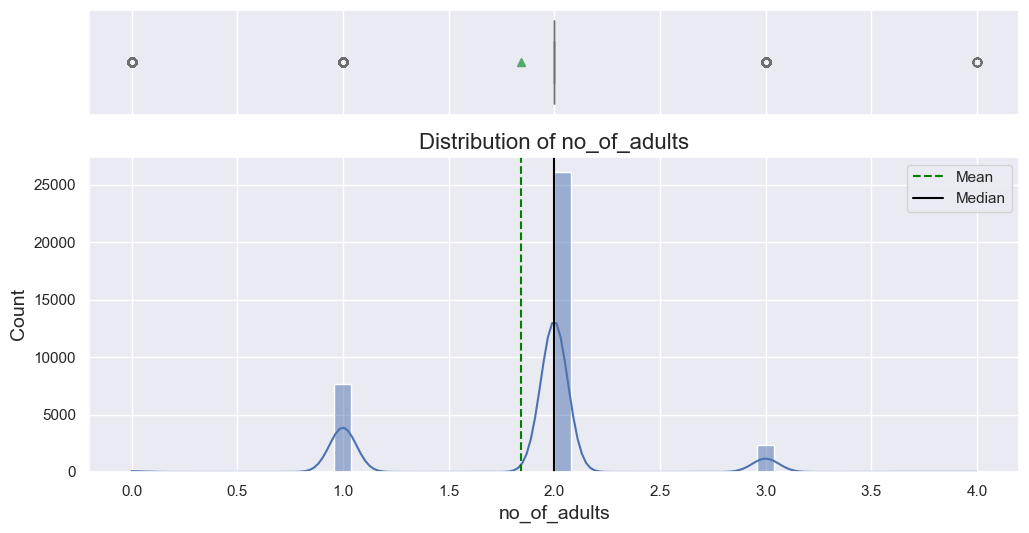

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_children'
count   36275.00000
mean        0.10528
std         0.40265
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        10.00000
Name: no_of_children, dtype: float64


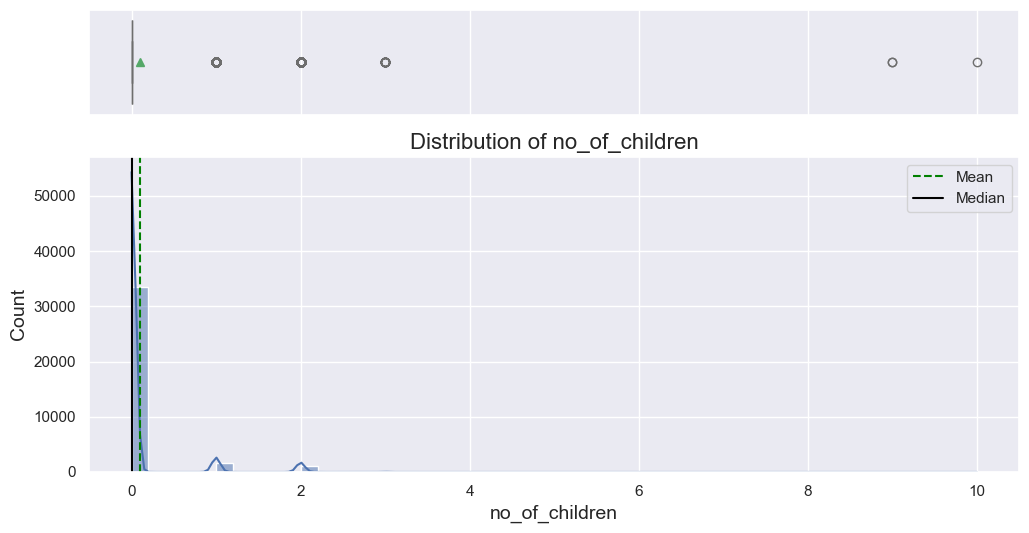

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_weekend_nights'
count   36275.00000
mean        0.81072
std         0.87064
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         7.00000
Name: no_of_weekend_nights, dtype: float64


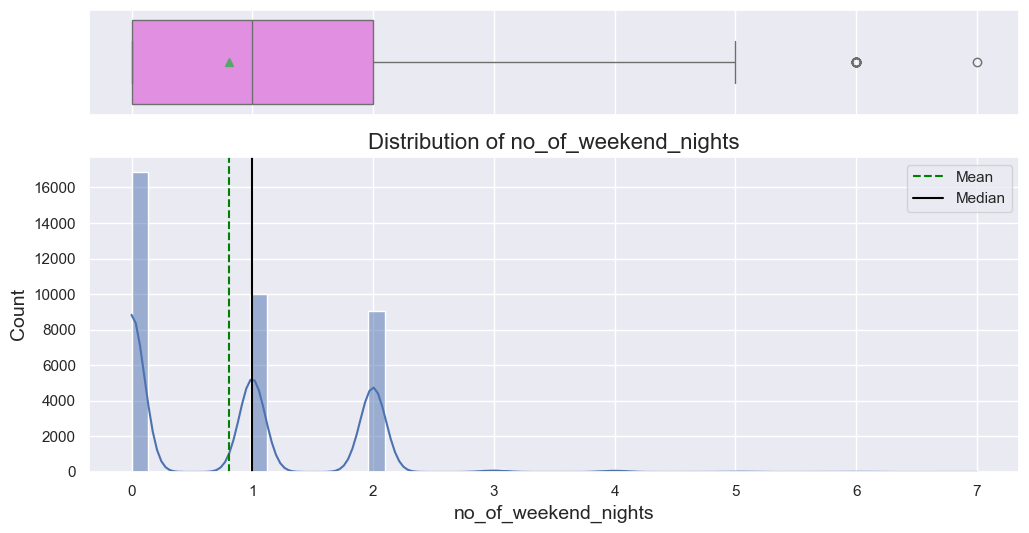

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_week_nights'
count   36275.00000
mean        2.20430
std         1.41090
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max        17.00000
Name: no_of_week_nights, dtype: float64


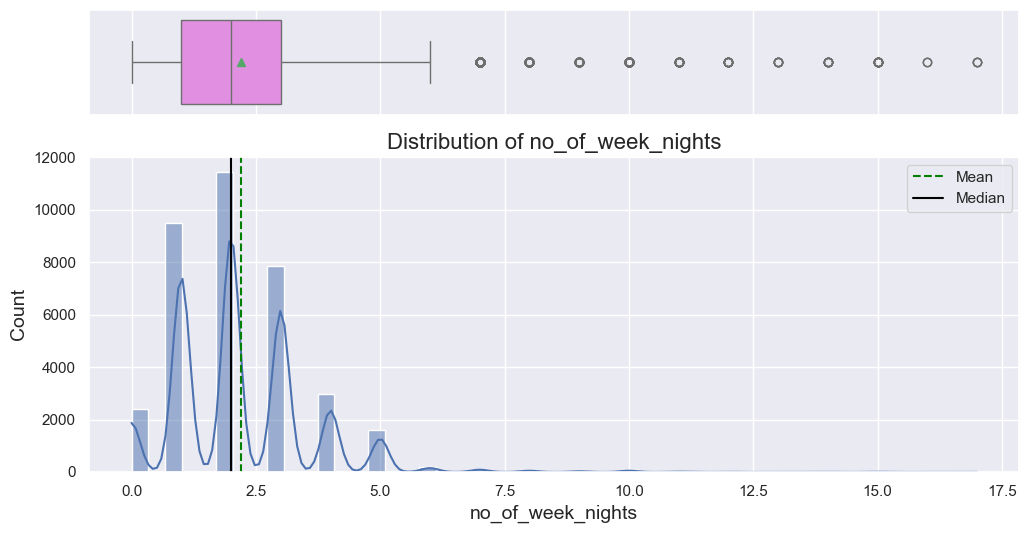

----------------------------------------------------------------------------------------------------
Distribution of 'required_car_parking_space'
count   36275.00000
mean        0.03099
std         0.17328
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: required_car_parking_space, dtype: float64


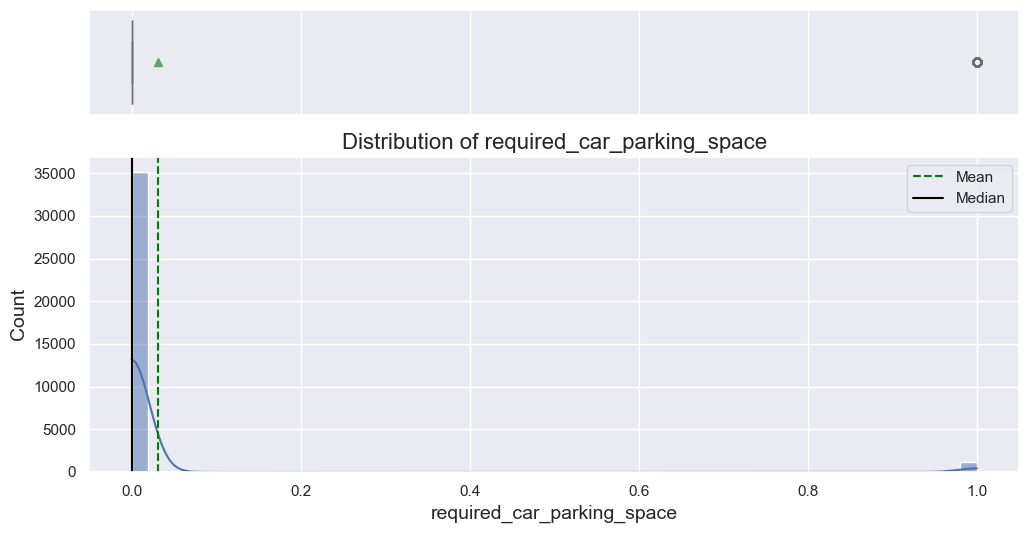

----------------------------------------------------------------------------------------------------
Distribution of 'lead_time'
count   36275.00000
mean       85.23256
std        85.93082
min         0.00000
25%        17.00000
50%        57.00000
75%       126.00000
max       443.00000
Name: lead_time, dtype: float64


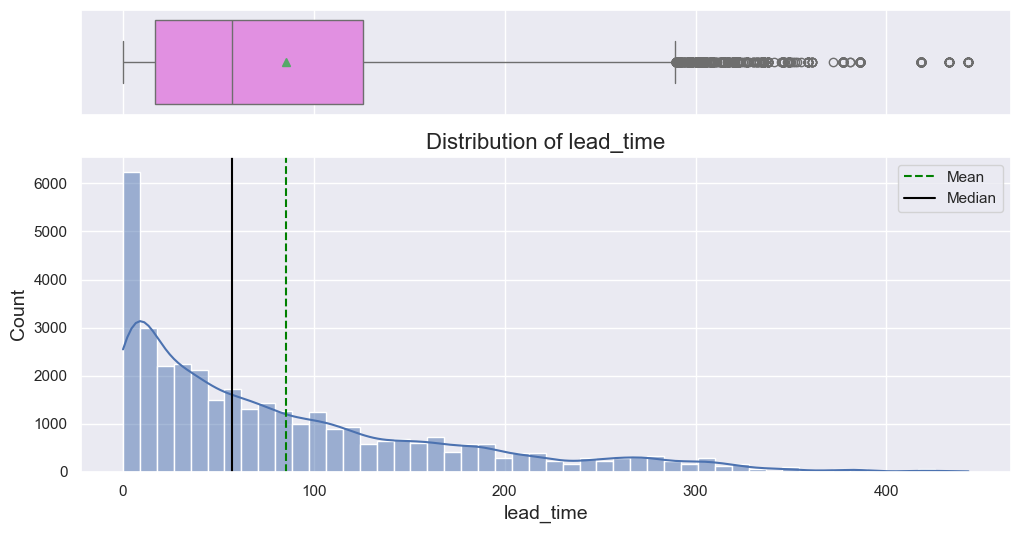

----------------------------------------------------------------------------------------------------
Distribution of 'arrival_year'
count   36275.00000
mean     2017.82043
std         0.38384
min      2017.00000
25%      2018.00000
50%      2018.00000
75%      2018.00000
max      2018.00000
Name: arrival_year, dtype: float64


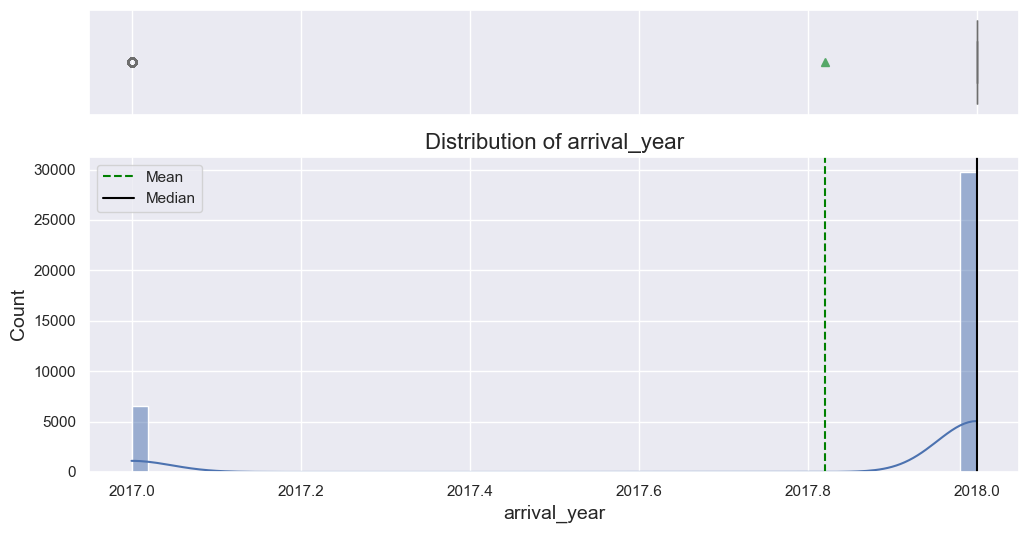

----------------------------------------------------------------------------------------------------
Distribution of 'arrival_month'
count   36275.00000
mean        7.42365
std         3.06989
min         1.00000
25%         5.00000
50%         8.00000
75%        10.00000
max        12.00000
Name: arrival_month, dtype: float64


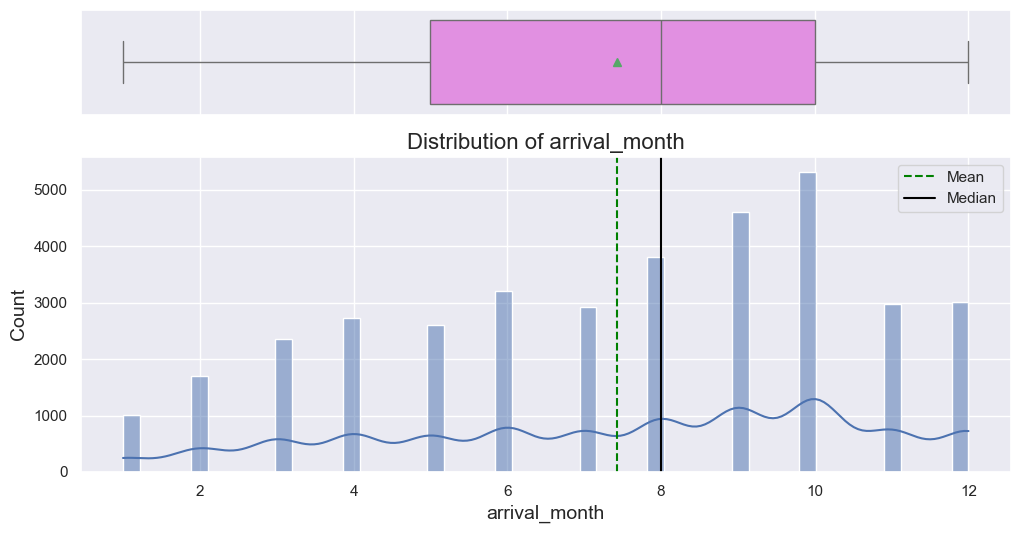

----------------------------------------------------------------------------------------------------
Distribution of 'arrival_date'
count   36275.00000
mean       15.59700
std         8.74045
min         1.00000
25%         8.00000
50%        16.00000
75%        23.00000
max        31.00000
Name: arrival_date, dtype: float64


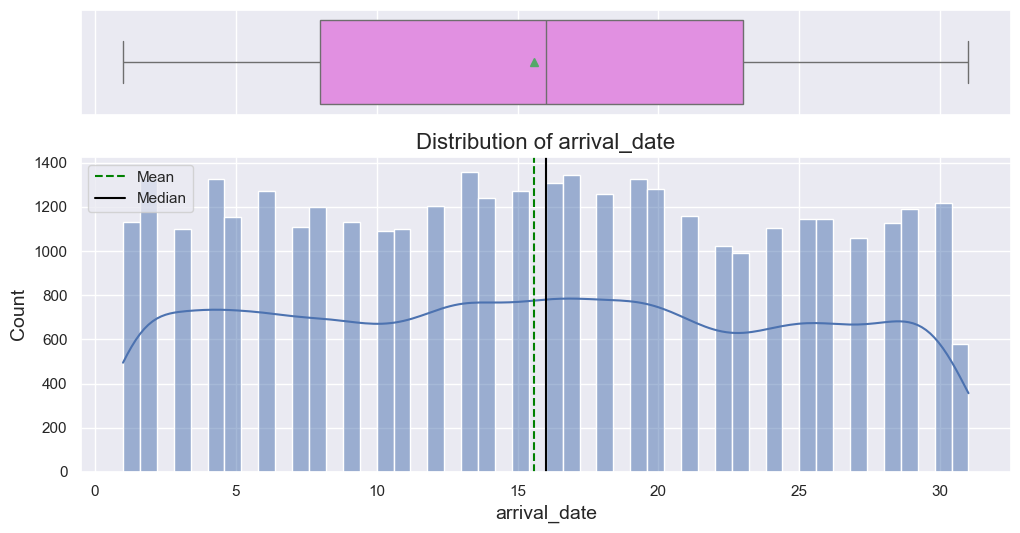

----------------------------------------------------------------------------------------------------
Distribution of 'repeated_guest'
count   36275.00000
mean        0.02564
std         0.15805
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: repeated_guest, dtype: float64


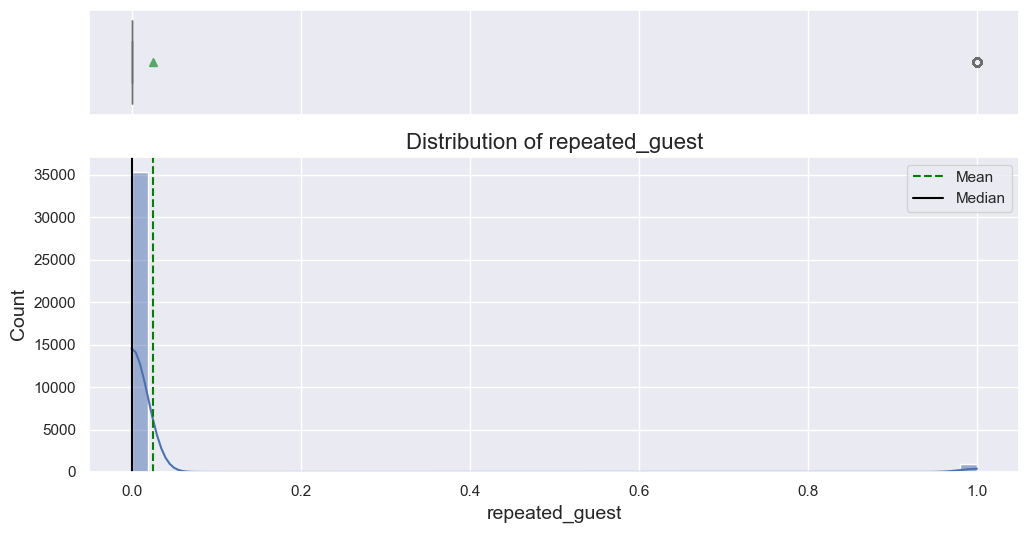

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_previous_cancellations'
count   36275.00000
mean        0.02335
std         0.36833
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        13.00000
Name: no_of_previous_cancellations, dtype: float64


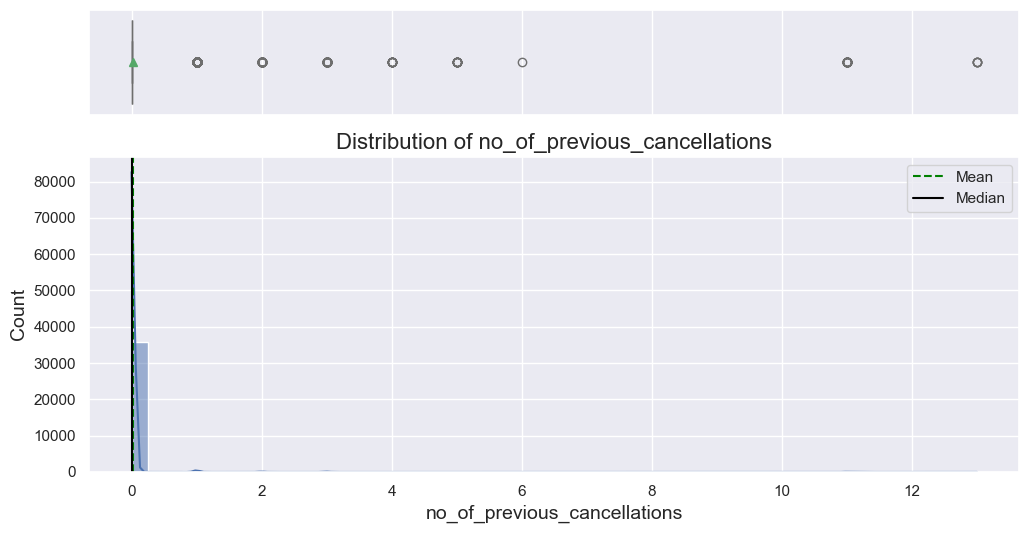

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_previous_bookings_not_canceled'
count   36275.00000
mean        0.15341
std         1.75417
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        58.00000
Name: no_of_previous_bookings_not_canceled, dtype: float64


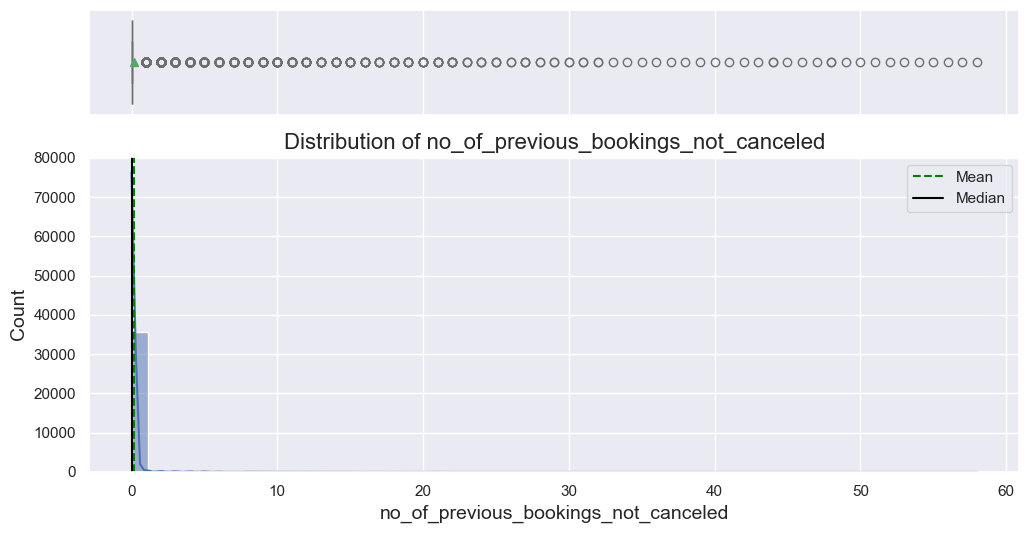

----------------------------------------------------------------------------------------------------
Distribution of 'avg_price_per_room'
count   36275.00000
mean      103.42354
std        35.08942
min         0.00000
25%        80.30000
50%        99.45000
75%       120.00000
max       540.00000
Name: avg_price_per_room, dtype: float64


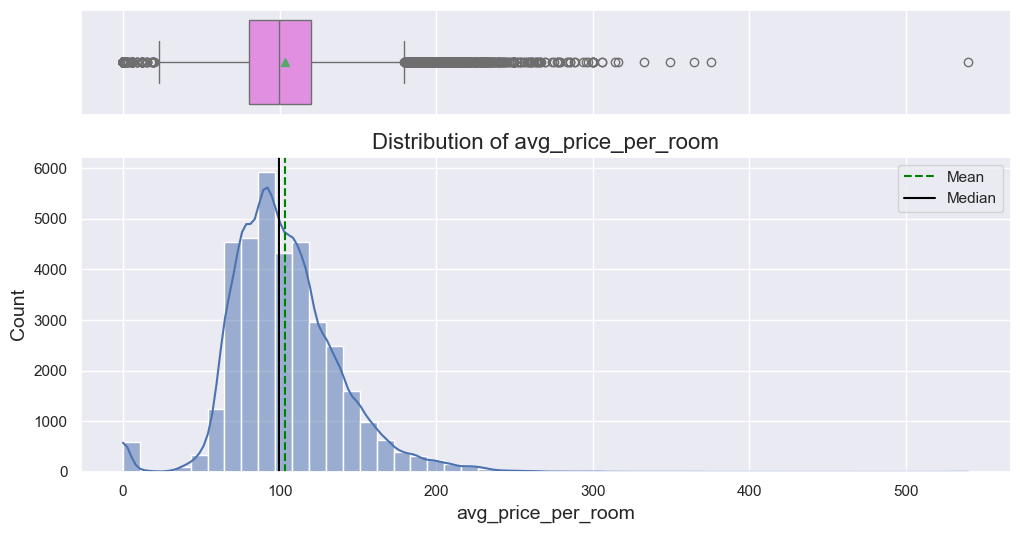

----------------------------------------------------------------------------------------------------
Distribution of 'no_of_special_requests'
count   36275.00000
mean        0.61966
std         0.78624
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         5.00000
Name: no_of_special_requests, dtype: float64


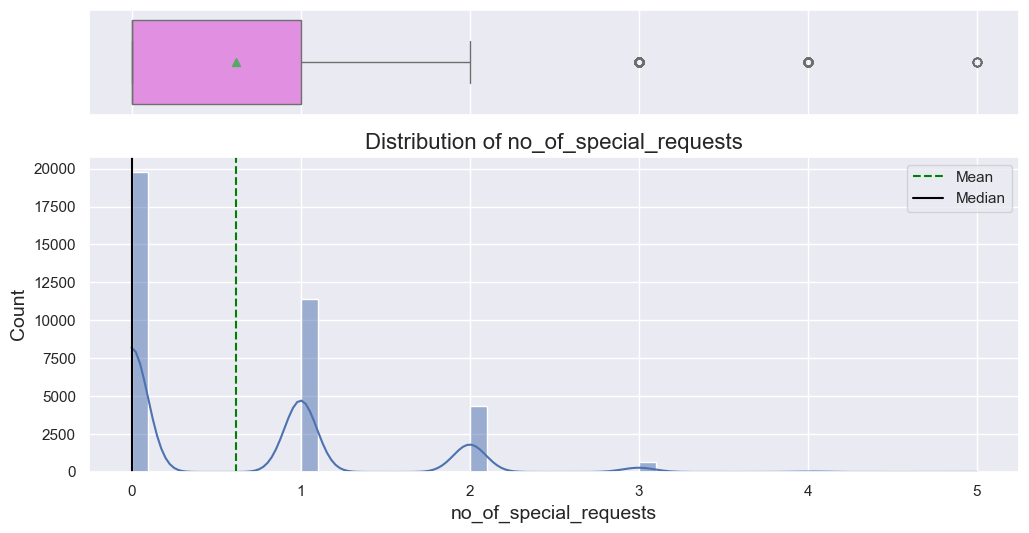

----------------------------------------------------------------------------------------------------


In [92]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df_eda.select_dtypes(include=["int64", "float64", "complex"]).columns

# Iterate through each numerical column and plot the histogram and boxplot combined
for column in num_cols:
    print(f"Distribution of '{column}'")
    print(df_eda[column].describe())
    histogram_boxplot(df_eda, column, bins=50, kde=True)
    print("-" * 100)


#### <a id="analysis-of-categorical-features"></a>3.1.2 Analysis of Categorical Features


Distribution of ' type_of_meal_plan '
count           36275
unique              4
top       Meal Plan 1
freq            27835
Name: type_of_meal_plan, dtype: object


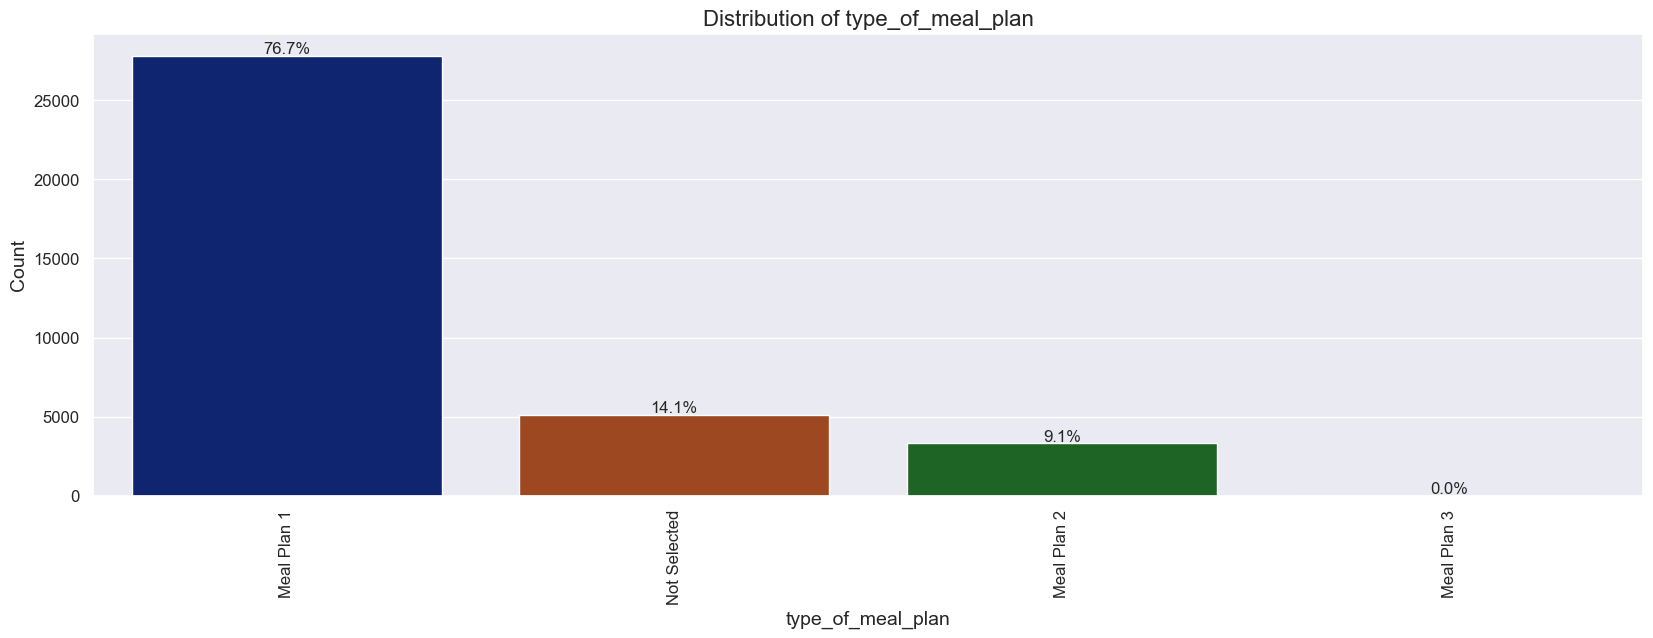

----------------------------------------------------------------------------------------------------
Distribution of ' room_type_reserved '
count           36275
unique              7
top       Room_Type 1
freq            28130
Name: room_type_reserved, dtype: object


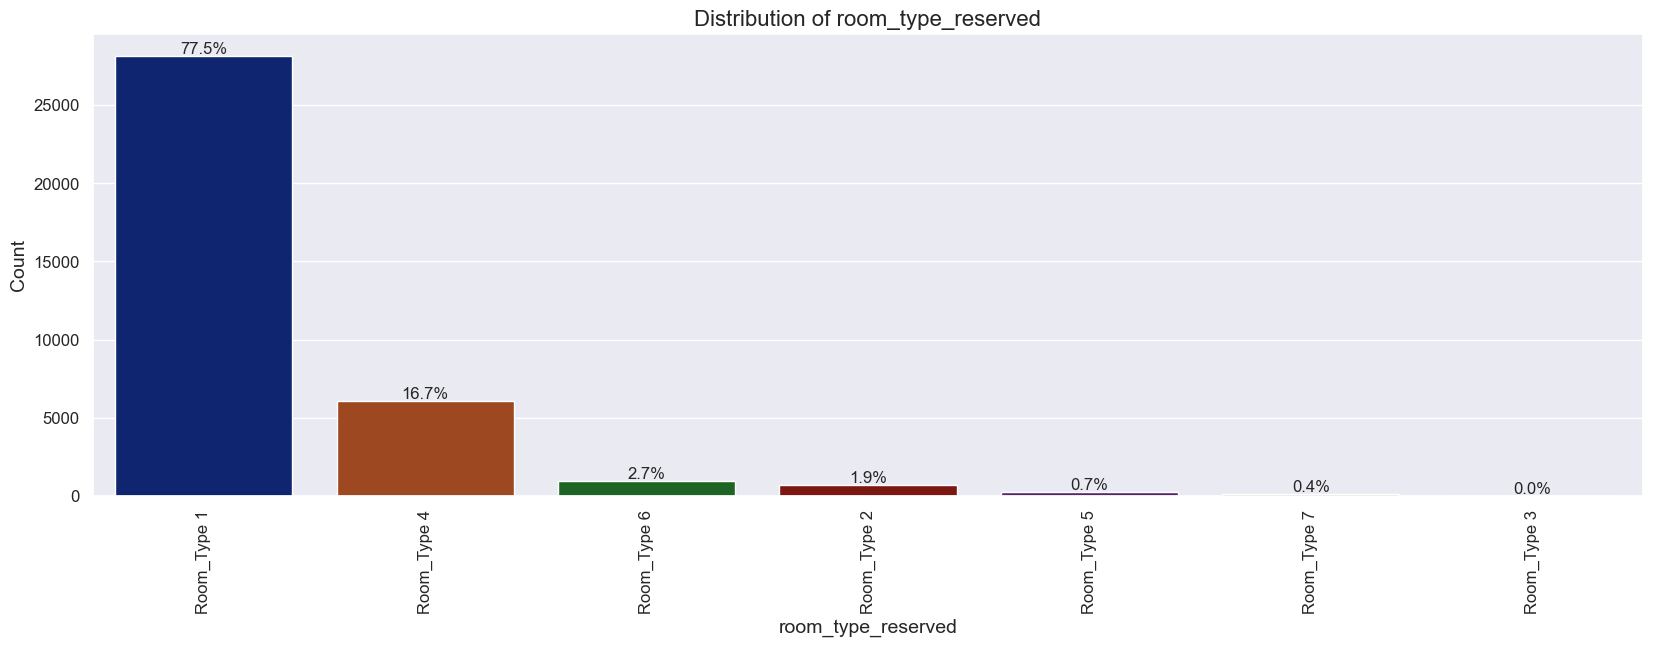

----------------------------------------------------------------------------------------------------
Distribution of ' market_segment_type '
count      36275
unique         5
top       Online
freq       23214
Name: market_segment_type, dtype: object


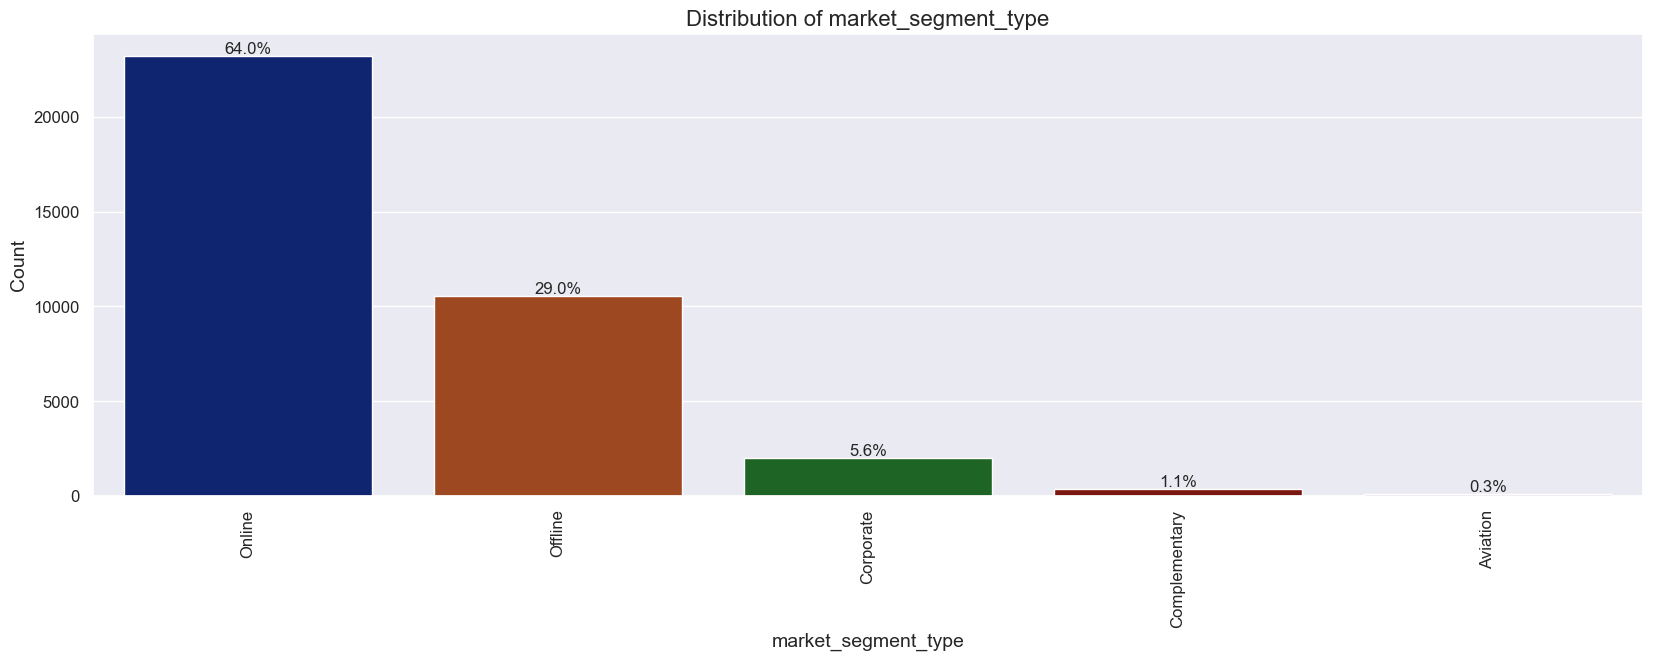

----------------------------------------------------------------------------------------------------
Distribution of ' booking_status '
count            36275
unique               2
top       Not_Canceled
freq             24390
Name: booking_status, dtype: object


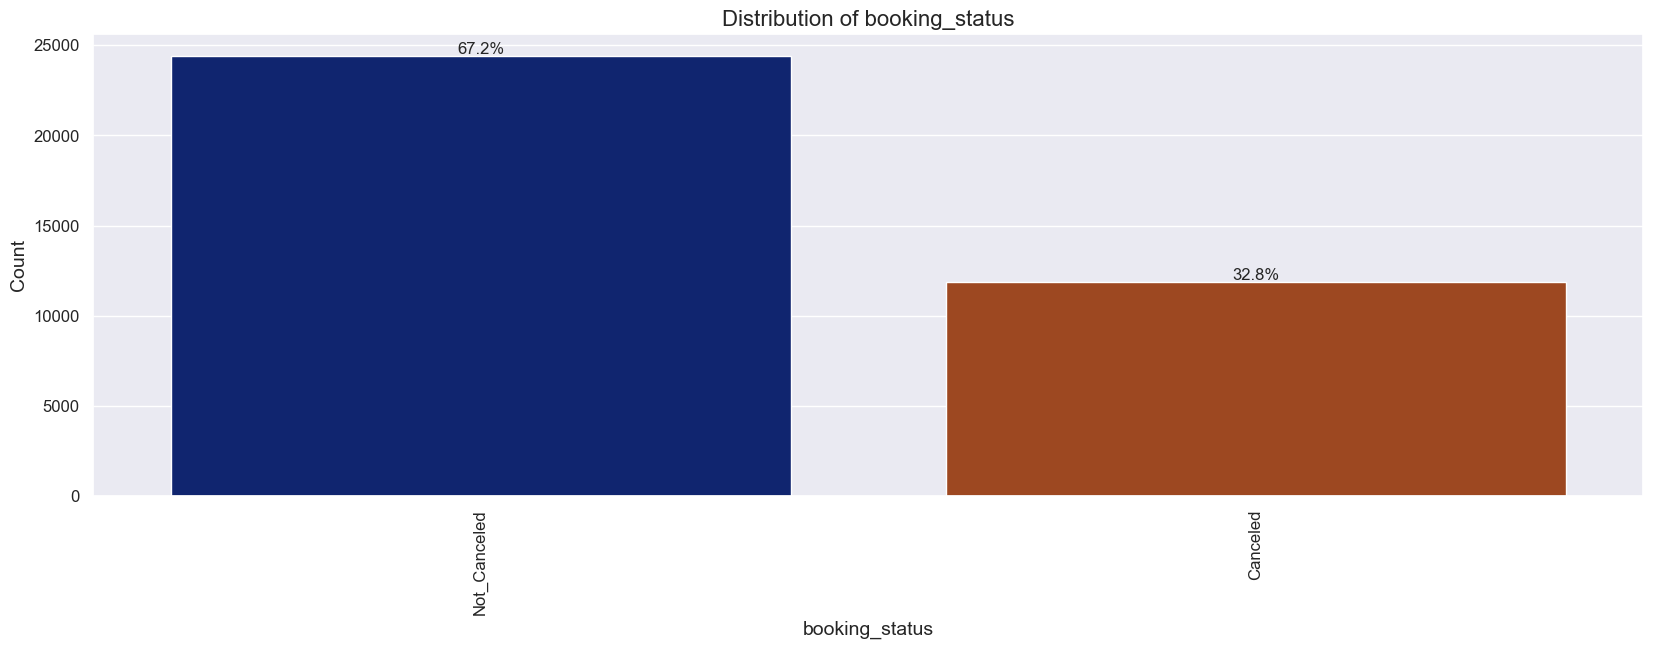

----------------------------------------------------------------------------------------------------


In [93]:
# Making a list of all categorical variables ('object' or 'category')
cat_cols = df_eda.select_dtypes(include=["object", "category"]).columns

# Iterate through each categorical column and plot the distribution
for column in cat_cols:
    print("Distribution of '", column, "'")
    print(df_eda[column].describe())
    labeled_barplot(df_eda, column, perc=True)
    print("-" * 100)


### Multivariate analysis 


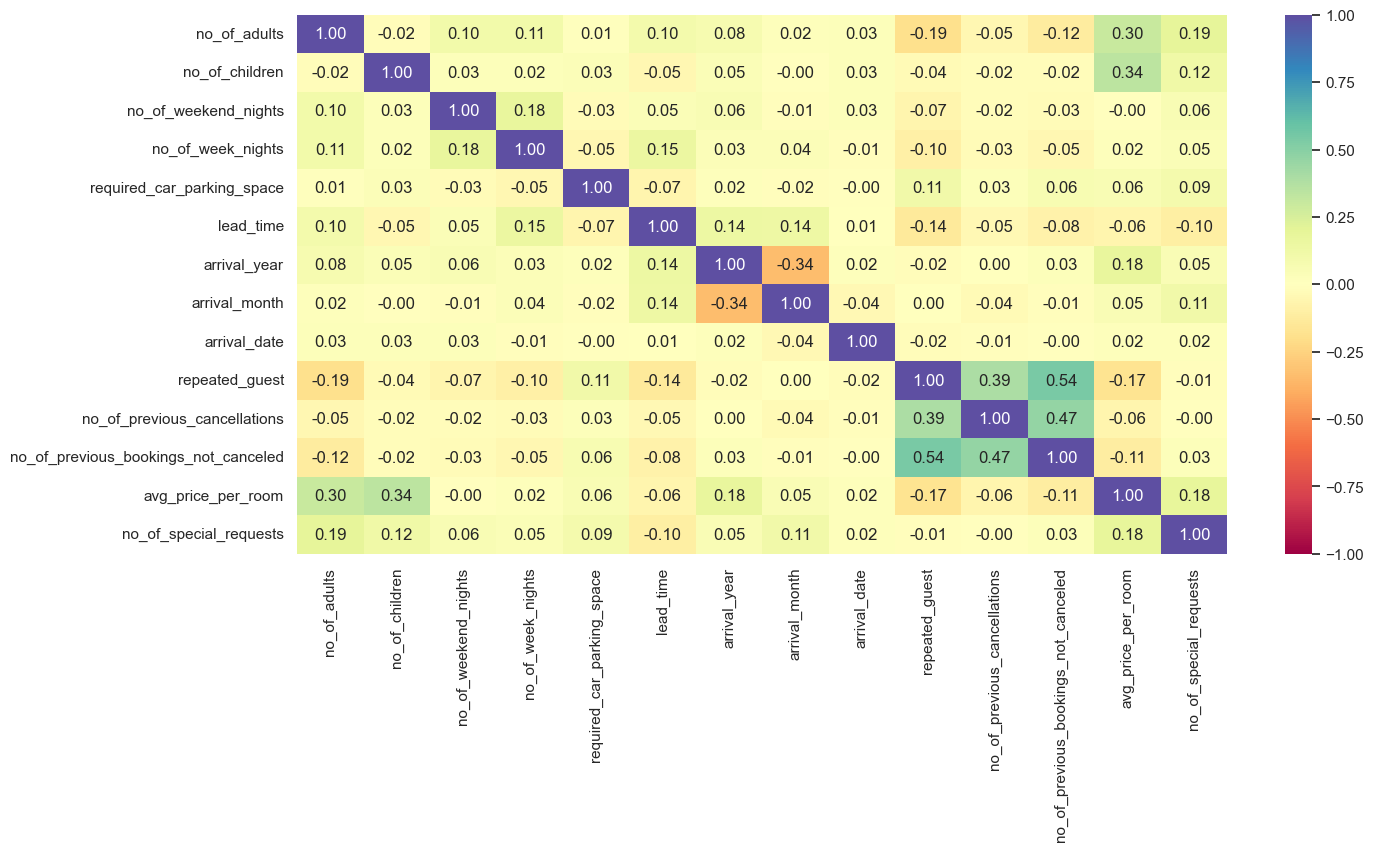

In [94]:
cols_list = df_eda.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
